In [3]:
!pip install klib


In [4]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import klib

import plotly.graph_objs as go

import plotly.express as px

# stats dependency
from scipy import stats
# feature_engineering dependency



import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Data file.csv')
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [6]:
# to show all the columns using pd.set_option
pd.set_option('display.max_columns',None)

In [7]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [8]:
# remove Unnamed column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.head()

label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

# Input Feature Description

Variable	Definition	Comment


* msisdn	mobile number of user

* aon	age on cellular network in days	

* daily_decr30	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	

* daily_decr90	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	

* rental30	Average main account balance over last 30 days	Unsure of given definition

* rental90	Average main account balance over last 90 days	Unsure of given definition

* last_rech_date_ma	Number of days till last recharge of main account	

* last_rech_date_da	Number of days till last recharge of data account	

* last_rech_amt_ma	Amount of last recharge of main account (in Indonesian Rupiah)

* cnt_ma_rech30	Number of times main account got recharged in last 30 days	

* fr_ma_rech30	Frequency of main account recharged in last 30 days	Unsure of given definition

* sumamnt_ma_rech30	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
* medianamnt_ma_rech30	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	

* medianmarechprebal30	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

* cnt_ma_rech90	Number of times main account got recharged in last 90 days	

* fr_ma_rech90	Frequency of main account recharged in last 90 days	Unsure of given definition

* sumamnt_ma_rech90	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
* medianamnt_ma_rech90	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

* medianmarechprebal90	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	

* cnt_da_rech30	Number of times data account got recharged in last 30 days	

* fr_da_rech30	Frequency of data account recharged in last 30 days	

* cnt_da_rech90	Number of times data account got recharged in last 90 days

* fr_da_rech90	Frequency of data account recharged in last 90 days	

* cnt_loans30	Number of loans taken by user in last 30 days	

* amnt_loans30	Total amount of loans taken by user in last 30 days

* maxamnt_loans30	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

* medianamnt_loans30	Median of amounts of loan taken by the user in last 30 days	

* cnt_loans90	Number of loans taken by user in last 90 days

* amnt_loans90	Total amount of loans taken by user in last 90 days	

* maxamnt_loans90	maximum amount of loan taken by the user in last 90 days

* medianamnt_loans90	Median of amounts of loan taken by the user in last 90 days	

* payback30	Average payback time in days over last 30 days	

* payback90	Average payback time in days over last 90 days	

* pcircle	telecom circle	

* pdate	date	


# Target Feature

* label	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}


In [10]:
df.columns,print(len(df.columns))

36


(Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
        'rental90', 'last_rech_date_ma', 'last_rech_date_da',
        'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
        'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
        'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
        'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
        'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
        'payback90', 'pcircle', 'pdate'],
       dtype='object'),
 None)

In [11]:
df.shape

(209593, 36)

* there are 209593 rows and 36 columns.

In [12]:
# checking null value 

In [13]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

* there is no null value present.

In [14]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

* only three features are object data type ,rest of the features are int or float data type.

# Check correlation & Visualize

In [16]:
df.corr()

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

In [17]:
klib.corr_mat(df)

* here  red color shows negative correlation and black color show positive correlation. 

<AxesSubplot:>

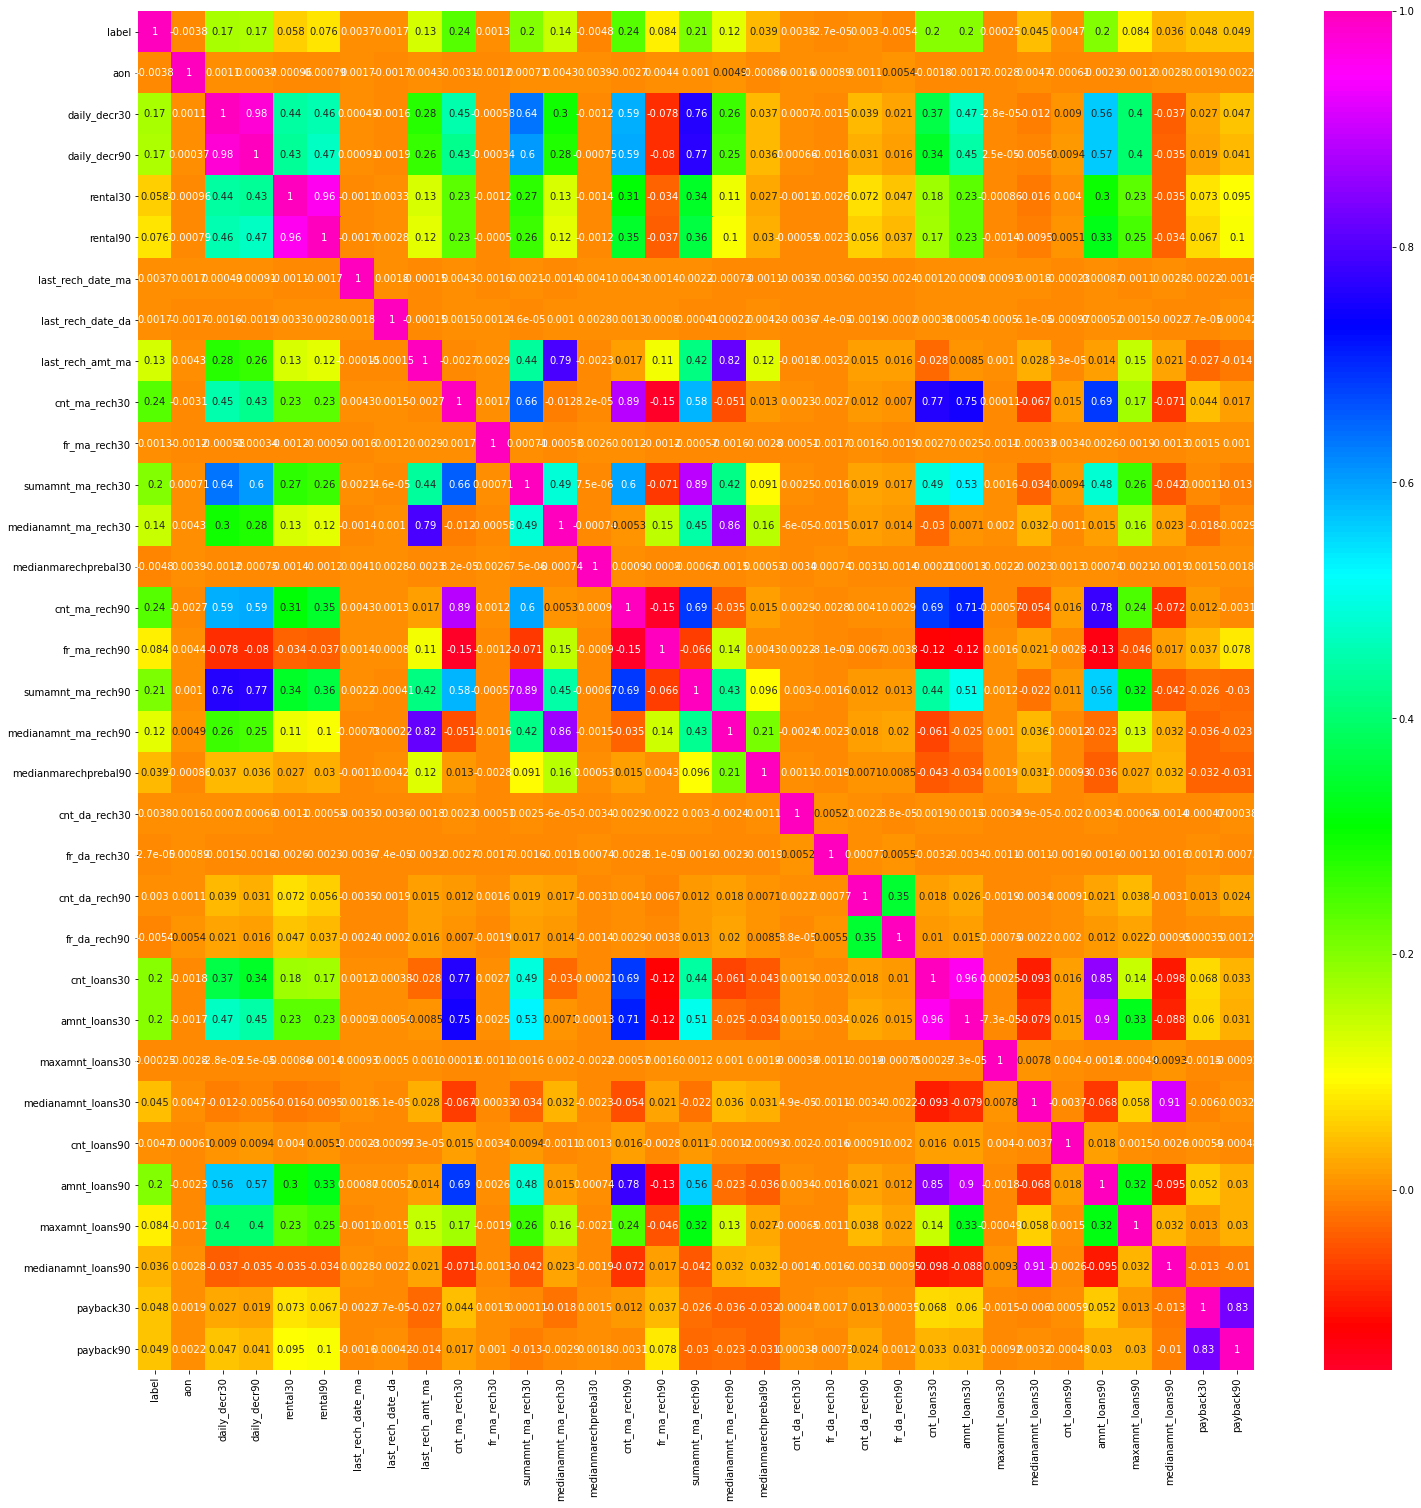

In [18]:
# visualizing the correlations
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='gist_rainbow')

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

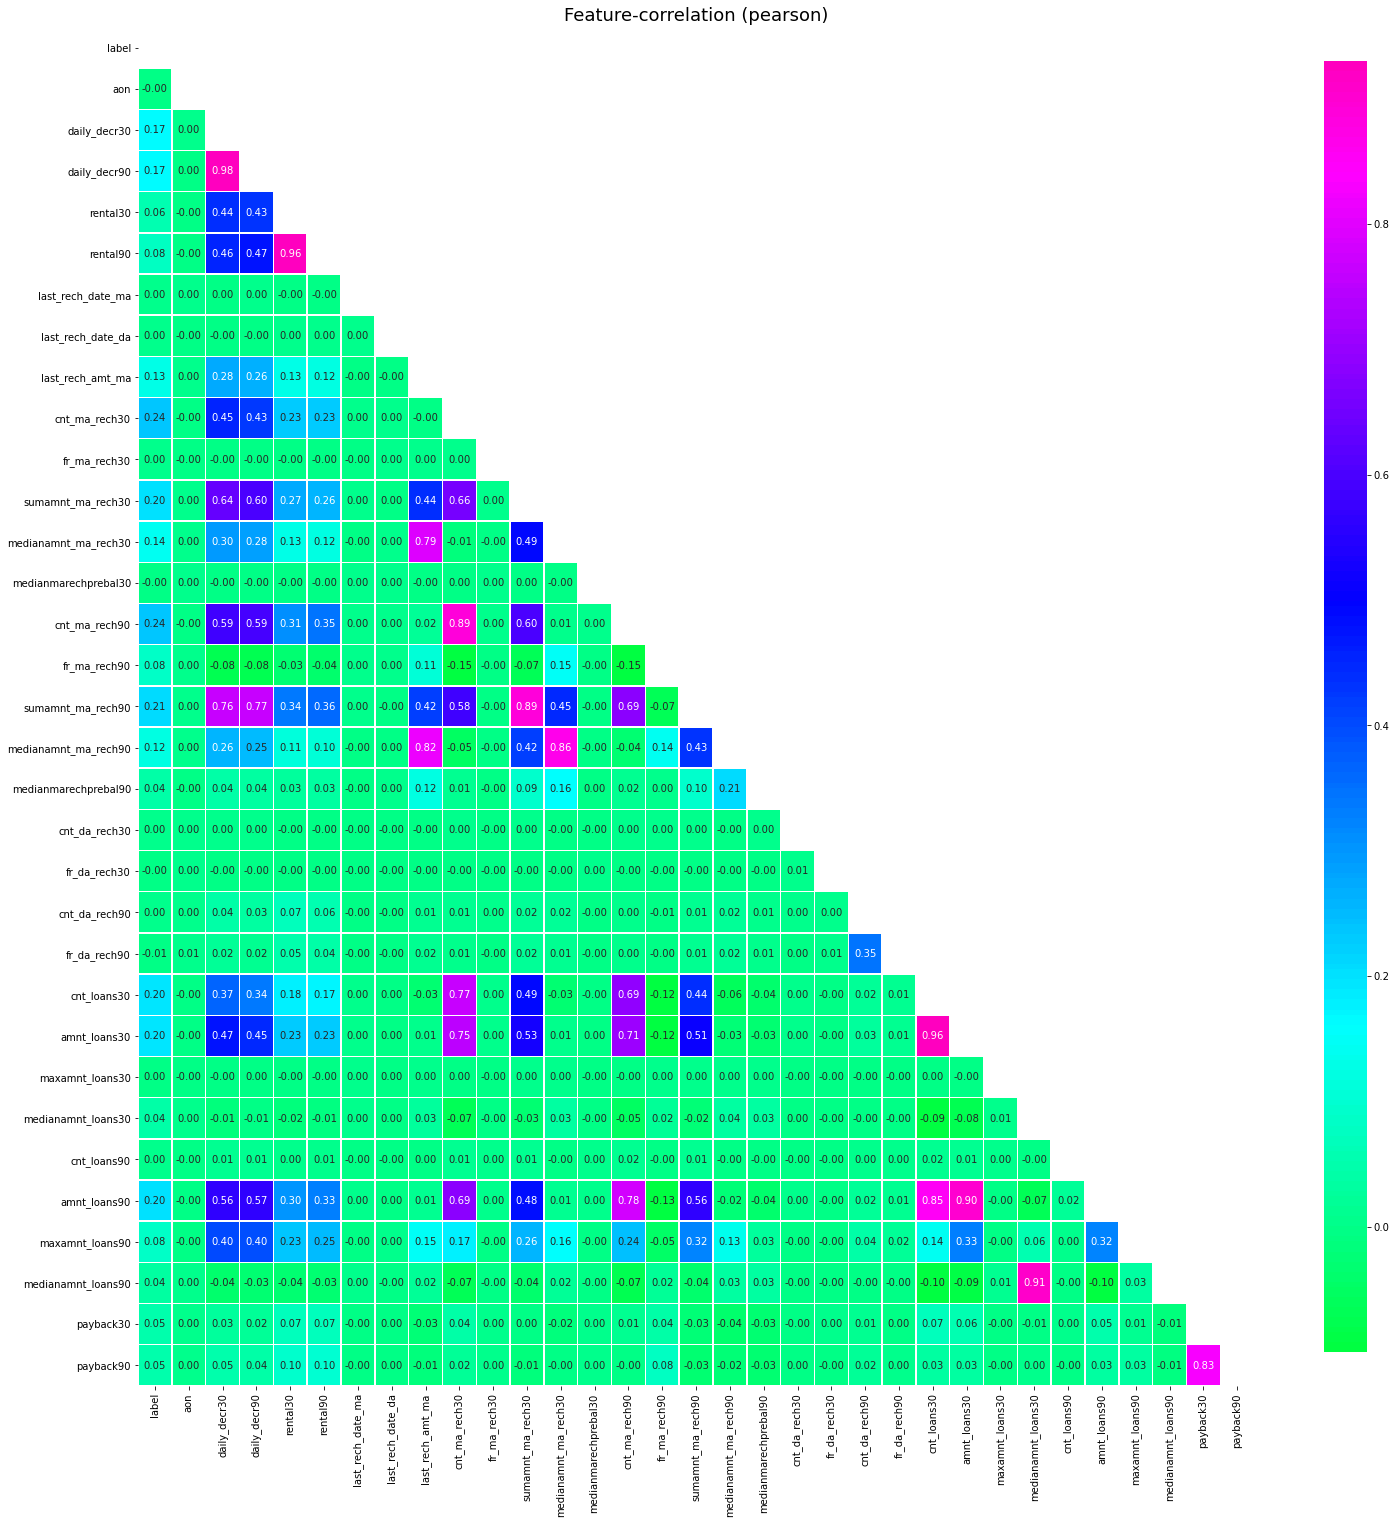

In [19]:
klib.corr_plot(df,figsize=(25,25),cmap='gist_rainbow')

* Daily spent of main account for 30 days and 90 days is highly (near perfectly) correlated.
* The rest of the features seems fine. 

# Univarient Analysis

In [20]:
# let start from label

In [21]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

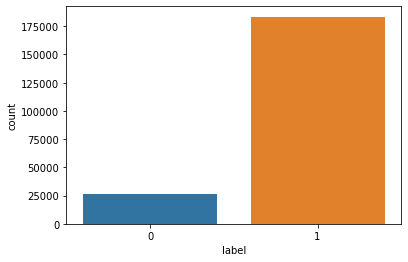

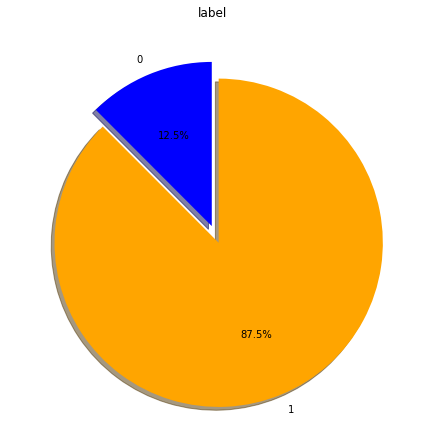

In [22]:
sns.countplot(df.label)
from collections import Counter

labels, values = zip(*Counter(df["label"]).items())
colors = [ 'blue','orange']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.01,0.1),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("label")
plt.show()

* 0 -> defaulters i.e 12.5% are defeaulters.
* 1 -> non-defeaulters i.e 87.5% are non defeaulters.

In [23]:
# aon-> age on cellular network in days

In [24]:
df['aon'].value_counts()

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514      1
913930.093986      1
Name: aon, Length: 4507, dtype: int64

<AxesSubplot:xlabel='aon', ylabel='Density'>

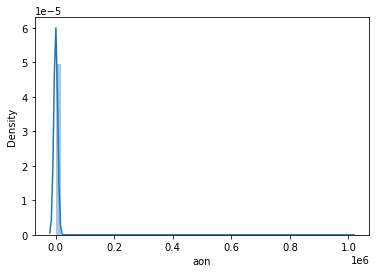

In [25]:
sns.distplot(df.aon)

In [26]:
#daily_decr30-> Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

In [27]:
df['daily_decr30'].value_counts()

0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
10831.550000       1
4908.100000        1
9460.015000        1
25.510333          1
8025.668000        1
Name: daily_decr30, Length: 147025, dtype: int64

<AxesSubplot:ylabel='Frequency'>

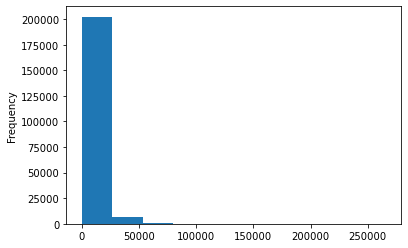

In [28]:
df['daily_decr30'].plot(kind='hist')

In [29]:
# lets get the values over 50000
df[df.daily_decr30 > 50000]


label       msisdn     aon   daily_decr30  daily_decr90  rental30  \
210         1  94452I70376   311.0   50300.121667     50425.730   6876.70   
279         1  92786I91190   515.0   52099.000000     53448.350   4338.36   
455         1  89667I70374   770.0   50958.000000     63673.690   8807.80   
570         1  69671I89237   172.0   68657.000000     73966.290  14926.14   
856         1  79095I85349   407.0   69457.648000     69832.360  29035.57   
...       ...          ...     ...            ...           ...       ...   
207567      1  66699I90583   781.0  102406.000000    153727.180  15684.28   
207664      1  78227I70371   409.0   57358.000000     65350.570   6373.84   
208872      1  50556I84458  2050.0   63892.500000    111462.210  21585.95   
209217      1  89841I84457   174.0   70815.841333     71078.724  10084.96   
209346      1  79103I82730   258.0   50652.000000     69834.960  17807.12   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
210      8651.45                4.0                0.0              8000   
279      5826.66                1.0                0.0              3178   
455     13526.72                1.0                0.0              1539   
570     13007.94               11.0                0.0             16000   
856     31853.97                1.0                0.0              2309   
...          ...                ...                ...               ...   
207567  25355.23                1.0                0.0              8000   
207664   7410.01                4.0               59.0              1539   
208872  27391.09                6.0                0.0              1539   
209217  12933.26                3.0               26.0              8000   
209346  20460.38                1.0                0.0               770   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
210                 9           4.0            54641.0                8000.0   
279                17           1.0            52191.0                3178.0   
455                27           1.0            48366.0                 770.0   
570                 6           1.0            64000.0                8000.0   
856                17           1.0            73764.0                4048.0   
...               ...           ...                ...                   ...   
207567             19           1.0            99833.0                4048.0   
207664             17           1.0            34465.0                 770.0   
208872             29           0.0            53253.0                1539.0   
209217             23           1.0           102033.0                4048.0   
209346             11           1.0            20010.0                1539.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
210                    100.5             15             4              67065   
279                    362.6             30             1              82238   
455                      8.1             70             0              82870   
570                   2042.0             17             5             167526   
856                     55.2             24             1             113808   
...                      ...            ...           ...                ...   
207567                 194.0             41             1             189188   
207664                 171.0             29             0              56841   
208872                  29.0             82             0             194950   
209217                  29.5             32             1             130638   
209346                 148.0             16             1              28476   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
210                   2320.0                136.50            0.0   
279                   2309.0                448.60            0.0   
455                    773.0             

In [30]:
print(len(df[df.daily_decr30 > 50000]))

1184


* there are 1184 rows having value over 50000

In [31]:
# data will would loose
sample_loss = len(df[df.daily_decr30 > 50000])
sample_loss

1184

In [32]:
#loss percentage
sample_loss / len(df) * 100

0.5649043622640069

<AxesSubplot:ylabel='Frequency'>

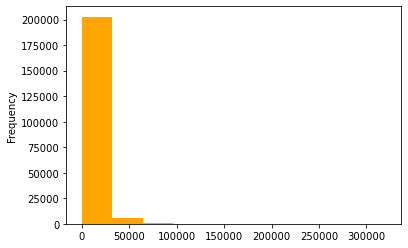

In [33]:
df['daily_decr90'].plot(kind='hist',color='orange')

In [34]:
# lets get the values over 50000
df[df.daily_decr90 > 50000]


label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
130         1  91716I90841   365.0  44836.000000     52266.890   6394.29   
201         1  60002I84456  2058.0  39557.000000     54218.950  20929.48   
210         1  94452I70376   311.0  50300.121667     50425.730   6876.70   
213         1  00180I82736   999.0  46992.000000     55642.080  11529.63   
279         1  92786I91190   515.0  52099.000000     53448.350   4338.36   
...       ...          ...     ...           ...           ...       ...   
209217      1  89841I84457   174.0  70815.841333     71078.724  10084.96   
209226      1  16815I90587   931.0  32598.000000     65449.580   5801.49   
209277      1  00575I85349   165.0  36800.000000     58127.000   4903.20   
209297      1  89681I70379   339.0  44066.000000     59686.790   6876.45   
209346      1  79103I82730   258.0  50652.000000     69834.960  17807.12   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
130      8163.82                1.0                0.0              2309   
201     30084.10                1.0                0.0               770   
210      8651.45                4.0                0.0              8000   
213     20950.63                2.0                0.0              2309   
279      5826.66                1.0                0.0              3178   
...          ...                ...                ...               ...   
209217  12933.26                3.0               26.0              8000   
209226   4839.56                1.0                0.0               770   
209277   8794.78                2.0                0.0              1539   
209297  13617.11                1.0                0.0              1539   
209346  20460.38                1.0                0.0               770   

        cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
130                13           2.0            28775.0                2309.0   
201                15           1.0            38814.0                1539.0   
210                 9           4.0            54641.0                8000.0   
213                 6           0.0            34453.0                4048.0   
279                17           1.0            52191.0                3178.0   
...               ...           ...                ...                   ...   
209217             23           1.0           102033.0                4048.0   
209226             10           0.0            20107.0                 770.0   
209277             30           1.0            36173.0                1539.0   
209297             26           1.0            44931.0                1539.0   
209346             11           1.0            20010.0                1539.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
130                    26.00             34             2              81144   
201                    77.00             26             1              65483   
210                   100.50             15             4              67065   
213                  3282.00             12             0              68044   
279                   362.60             30             1              82238   
...                      ...            ...           ...                ...   
209217                 29.50             32             1             130638   
209226                868.31             19             6             108598   
209277                 44.00             75             1              87817   
209297                381.00             50             1              81875   
209346                148.00             16             1              28476   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
130                   2309.0                 26.00            0.0   
201                   1539.0                 76.00            0.0   
210                   2320.0                136.50   

In [35]:
print(len(df[df.daily_decr90 > 50000]))

2091


* there are 2091 rows having value over 50000 

<AxesSubplot:xlabel='daily_decr90', ylabel='Density'>

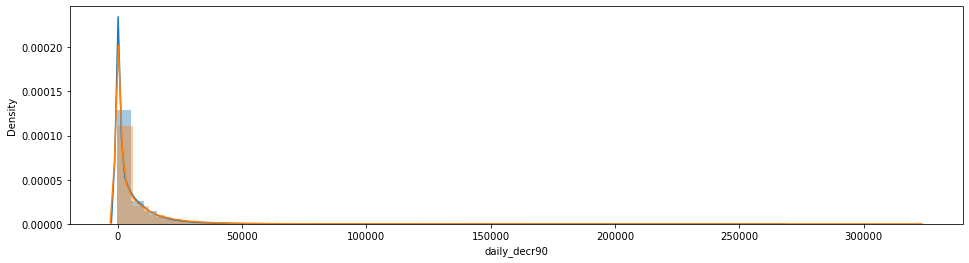

In [36]:
plt.figure(figsize=(16,4))
sns.distplot(df.daily_decr30)
sns.distplot(df.daily_decr90)

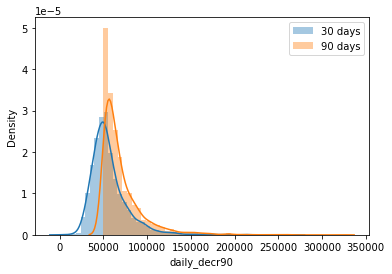

In [37]:
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr30'],label = '30 days')
sns.distplot(df[df.daily_decr90 > 50000]['daily_decr90'], label = '90 days')
plt.legend()

In [38]:
# data will would loose
sample_loss = len(df[df.daily_decr90 > 50000])
sample_loss

2091

In [39]:
#loss percentage
sample_loss / len(df) * 100

0.9976478222078028

* ~ around 1% of data will be lost if these are removed.

GridSpec(6, 3)

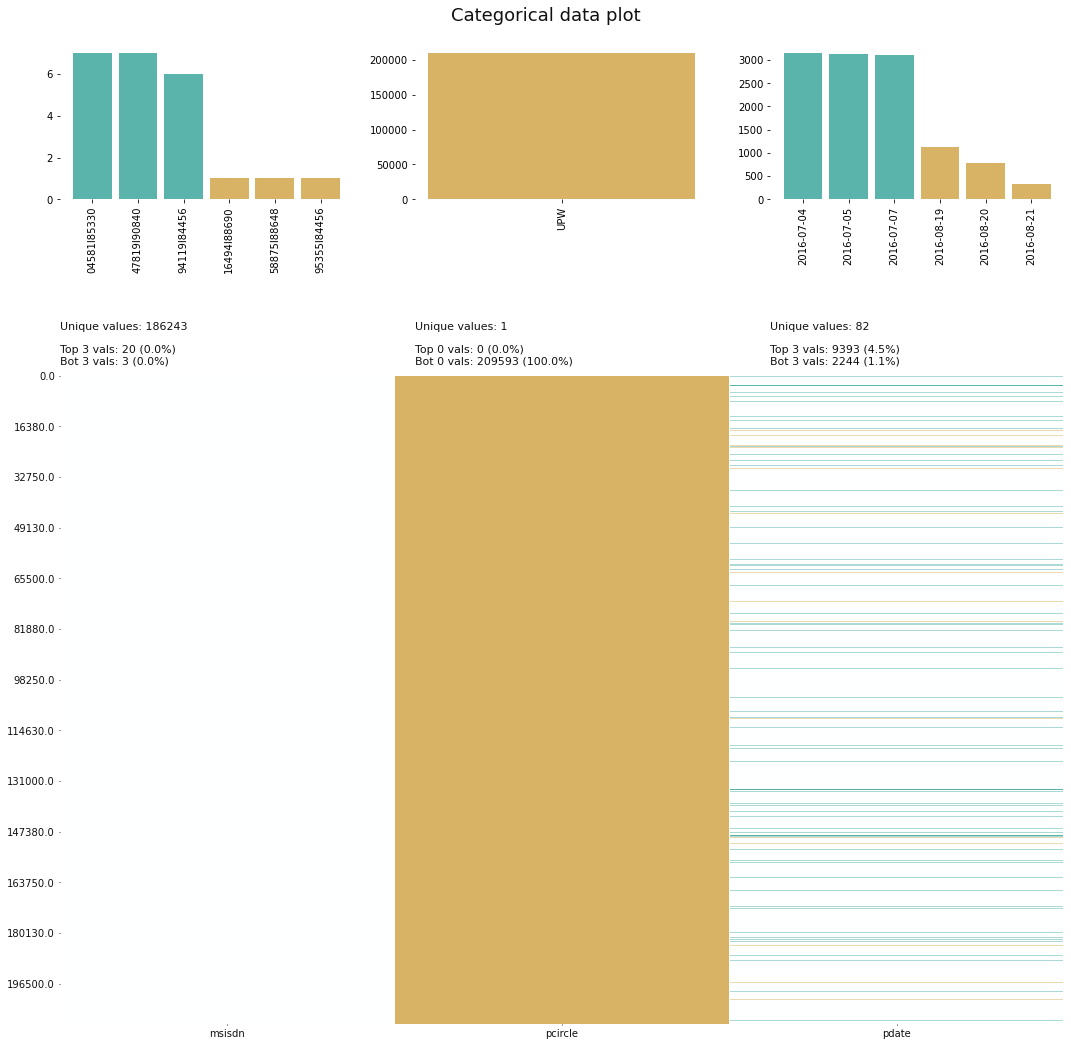

In [40]:
klib.cat_plot(df)

In [41]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [42]:
# we can remove this columns because it has unique value .

In [43]:
df.drop(['pcircle','msisdn','pdate'],axis=1,inplace=True)

In [44]:
# rental30-> Average main account balance over last 30 days Unsure of given definition

<AxesSubplot:xlabel='rental90'>

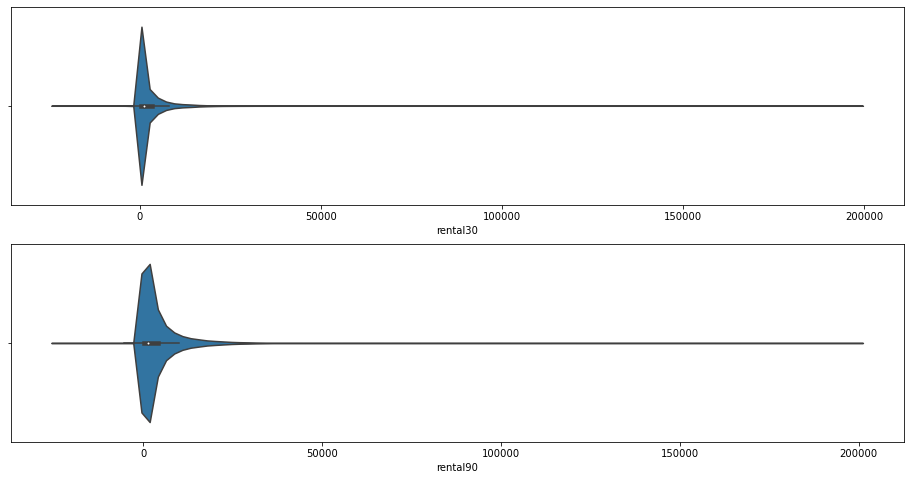

In [45]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(df.rental30)

fig.add_subplot(212)
sns.violinplot(df.rental90)

<AxesSubplot:xlabel='rental90'>

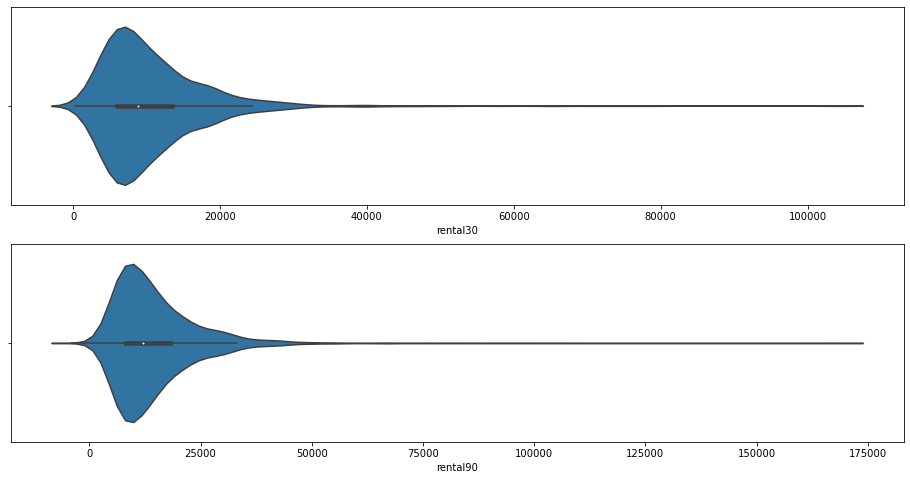

In [46]:
fig = plt.figure(figsize=(16,8))

fig.add_subplot(211)
sns.violinplot(df[df.daily_decr90 > 50000].rental30)


fig.add_subplot(212)
sns.violinplot(df[df.daily_decr90 > 50000].rental90)

* we can infer that those 2000 customers are a potential anomaly for the dataset.
* We shall hold a more strong evidence of these 2000 customer are potentials outliers, and then remove this 1 percent of the data from the dataset.

In [47]:
# number of days since last recharge (in main account and data account)

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

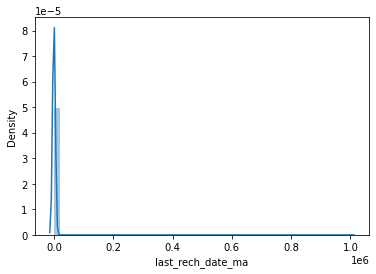

In [48]:
sns.distplot(df.last_rech_date_ma)

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

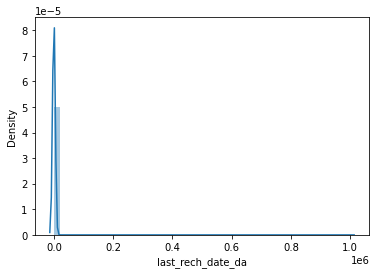

In [49]:
sns.distplot(df.last_rech_date_da)

In [50]:
df.last_rech_date_ma.describe()

count    209593.000000
mean       3755.847800
std       53905.892230
min         -29.000000
25%           1.000000
50%           3.000000
75%           7.000000
max      998650.377733
Name: last_rech_date_ma, dtype: float64

In [51]:
df.last_rech_date_da.describe()

count    209593.000000
mean       3712.202921
std       53374.833430
min         -29.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      999171.809410
Name: last_rech_date_da, dtype: float64

In [52]:
# let's get the last 1 quantile of the data for main

In [53]:
q = df.last_rech_date_ma.quantile(0.99)

In [54]:
df[df.last_rech_date_ma > q]

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
30          1  -42.0      8.864333      8.864333    780.71    780.71   
53          1  635.0      5.500000      5.500000     75.90     75.90   
106         0   72.0     13.590000     13.590000      0.00      0.00   
159         1  415.0   9507.542667   9622.480000    418.58   -239.39   
233         1  211.0      0.640000      0.640000    227.60    227.60   
...       ...    ...           ...           ...       ...       ...   
209466      1  190.0   2601.750000   2622.100000   -334.62   -441.57   
209501      1  460.0     55.520000     55.520000    877.40    877.40   
209521      1  281.0   1704.000000   1795.070000      0.00    180.00   
209533      0  168.0     15.400000     15.400000    922.20    922.20   
209536      1  427.0   5887.000000   5942.360000      0.00      0.00   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
30          780195.497093                0.0               773              2   
53          559958.753409                0.0               173              0   
106             64.000000                0.0               773              0   
159         835708.591971                0.0              1924              5   
233         942339.085159                0.0                 0              0   
...                   ...                ...               ...            ...   
209466      767980.563105                0.0              1539              4   
209501      611678.500427                0.0              1539              1   
209521          61.000000                0.0              3178              0   
209533      590843.121987                0.0              1539              1   
209536          64.000000               64.0              9400              0   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
30              10.0              946.0                 473.0   
53               0.0                0.0                   0.0   
106              0.0                0.0                   0.0   
159              2.0             8081.0                1924.0   
233              0.0                0.0                   0.0   
...              ...                ...                   ...   
209466          12.0             6156.0                1539.0   
209501           0.0             1539.0                1539.0   
209521           0.0                0.0                   0.0   
209533           0.0             1539.0                1539.0   
209536           0.0                0.0                   0.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
30                       1.8              3            32               2666   
53                       0.0              1             0                173   
106                      0.0              1             0                773   
159                     76.0              6            17               9620   
233                      0.0              0             0                  0   
...                      ...            ...           ...                ...   
209466                 145.5              5            47               7703   
209501                   0.5              2            42               2486   
209521                   0.0              2             1               6356   
209533                   1.0              1             0               1539   
209536                   0.0              1             0               9400   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
30                     773.0                  0.30            0.0   
53                     173.0                 94.47            0.0   
106                    773.0                 20.00            0.0   
159                   1731.5                 52.00            0.0   
233                      0.0                  0.00            0.0   
...           

<AxesSubplot:xlabel='last_rech_date_ma', ylabel='Density'>

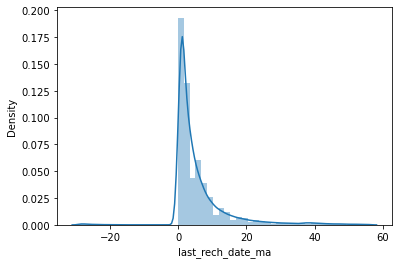

In [55]:
sns.distplot(df[df.last_rech_date_ma < q]['last_rech_date_ma'])

In [56]:
# let's get the last 1 quantile of the data for data

In [57]:
q1 = df.last_rech_date_da.quantile(0.99)

In [58]:
df[df.last_rech_date_da < q1]

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

<AxesSubplot:xlabel='last_rech_date_da', ylabel='Density'>

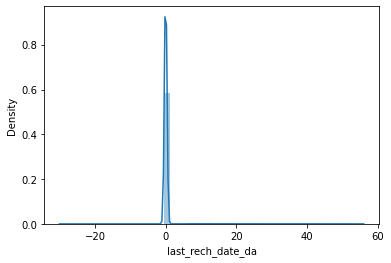

In [59]:
sns.distplot(df[df.last_rech_date_da < q1]['last_rech_date_da'])

* We can see that most of the users have the last recharge for data as 0 days

In [60]:
df[df.last_rech_date_da == 0]#['cnt_da_rech90'].unique()

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209587      1   239.0  14678.000000  14704.900000  12935.26  16775.60   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209587                8.0                0.0              3178              3   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209587           3.0            12143.0                3178.0   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209587                914.00              5            17              14455   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

In [61]:
df[df.last_rech_date_da == 0]['cnt_da_rech90'].unique()

array([0, 1], dtype=int64)

In [62]:
x=df[((df.last_rech_date_da == 0) & (df.cnt_da_rech90 == 0) & (df.fr_da_rech90 == 0))]

In [63]:
x

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209587      1   239.0  14678.000000  14704.900000  12935.26  16775.60   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209587                8.0                0.0              3178              3   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209587           3.0            12143.0                3178.0   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209587                914.00              5            17              14455   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

In [64]:

len(x)

202860

In [65]:
# let's get the people have a data account.

In [66]:
df[((df.last_rech_date_da != 0) & (df.cnt_da_rech90 != 0) & (df.fr_da_rech90 != 0))]

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
453         1   127.0   5488.006000   5513.084667   4389.15   4160.53   
865         1  1382.0   1624.816667   1654.450000   4115.28   5465.16   
925         0   544.0   5383.128000   5430.317333  12472.59  14278.59   
934         1  1713.0   3288.523333   3323.570000  17215.35  18499.71   
2506        1   417.0    841.949333    852.514667   5353.14   7686.38   
...       ...     ...           ...           ...       ...       ...   
208595      1   631.0  37099.794333  37285.383000   7341.04   6875.68   
208676      1  1170.0   7293.340000   7311.820000   8400.68   9103.90   
209111      1   515.0   7310.464000   7321.458667   4181.87   4393.13   
209159      1   542.0  17301.901333  17407.704000  13027.18  15072.02   
209217      1   174.0  70815.841333  71078.724000  10084.96  12933.26   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
453                   5.0                8.0               770              2   
865                   2.0               19.0               770              3   
925                   1.0               19.0              1539              2   
934                   1.0               12.0               770              4   
2506                 14.0               14.0               770              1   
...                   ...                ...               ...            ...   
208595               12.0               10.0              4048              3   
208676                5.0               16.0              1539              3   
209111                1.0               20.0               770              5   
209159                4.0               11.0              1539             17   
209217                3.0               26.0              8000             23   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
453              0.0             1540.0                 770.0   
865              5.0             3864.0                1547.0   
925             19.0            13413.0                6706.5   
934             16.0             4618.0                1154.5   
2506             0.0              770.0                 770.0   
...              ...                ...                   ...   
208595          11.0            24048.0               10000.0   
208676           9.0             5002.0                1539.0   
209111           8.0             5402.0                 773.0   
209159           2.0            23856.0                1539.0   
209217           1.0           102033.0                4048.0   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
453                   391.00              2             0               1540   
865                    89.00              7             5               8504   
925                     1.75              3            18              18330   
934                    65.00              8             4              10005   
2506                   60.00              2            25               1540   
...                      ...            ...           ...                ...   
208595                 75.00              6             2              52048   
208676                 23.03              5            11               8080   
209111                 65.20              6            14               6172   
209159                127.00             26             1              37824   
209217                 29.50             32             1             130638   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
453                    770.0                391.00            2.0   
865                   1547.0                 89.00            2.0   
925                   4917.0                  3.50            2.0   
934                   1539.0                 78.00            4.0   
2506                   770.0                 37.00            1.0   
..

In [67]:
865 / len (df) * 100

0.4127046227688902

* most of the users do not have a data account
* less than 0.5 percent of the customers hava a data account.

In [68]:
# last amount recharged in the main account since last 30 days

In [69]:
df.last_rech_amt_ma

0         1539
1         5787
2         1539
3          947
4         2309
          ... 
209588    4048
209589     773
209590    1539
209591     773
209592    7526
Name: last_rech_amt_ma, Length: 209593, dtype: int64

<AxesSubplot:xlabel='last_rech_amt_ma', ylabel='Density'>

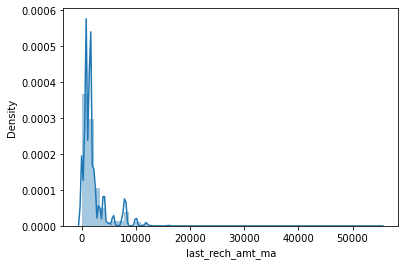

In [70]:
sns.distplot(df.last_rech_amt_ma)

In [71]:
df.last_rech_amt_ma.describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

<AxesSubplot:xlabel='last_rech_amt_ma'>

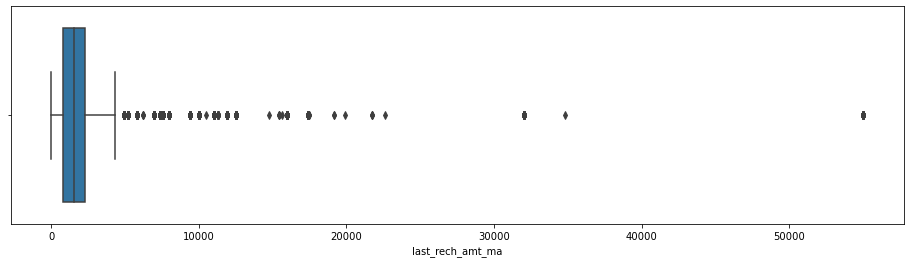

In [72]:
plt.figure(figsize=(16,4))
sns.boxplot(df.last_rech_amt_ma)

<AxesSubplot:xlabel='last_rech_amt_ma'>

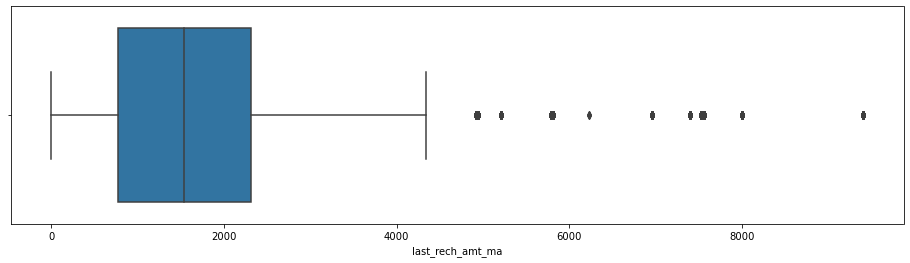

In [73]:
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.boxplot(df[df.last_rech_amt_ma < df.last_rech_amt_ma.quantile(0.99)]['last_rech_amt_ma'])

In [74]:
# number of times the recharge is done in the last 30 days and 90 days

<AxesSubplot:xlabel='cnt_ma_rech30'>

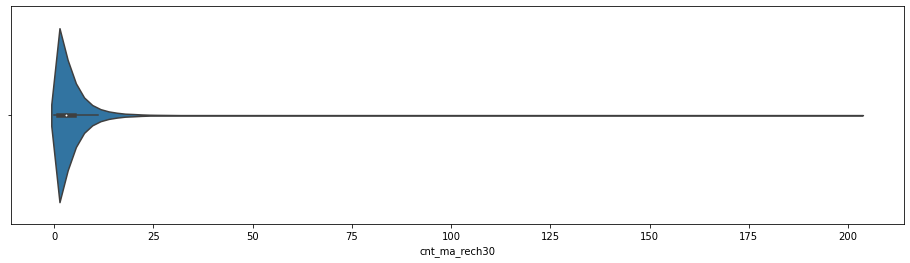

In [75]:
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech30)

<AxesSubplot:xlabel='cnt_ma_rech90'>

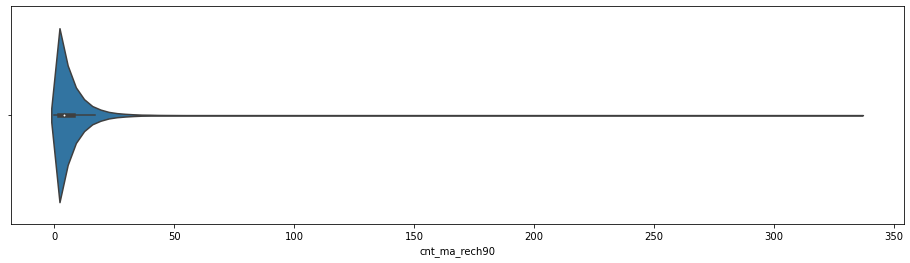

In [76]:
plt.figure(figsize=(16,4))
sns.violinplot(df.cnt_ma_rech90)

<AxesSubplot:xlabel='cnt_ma_rech30'>

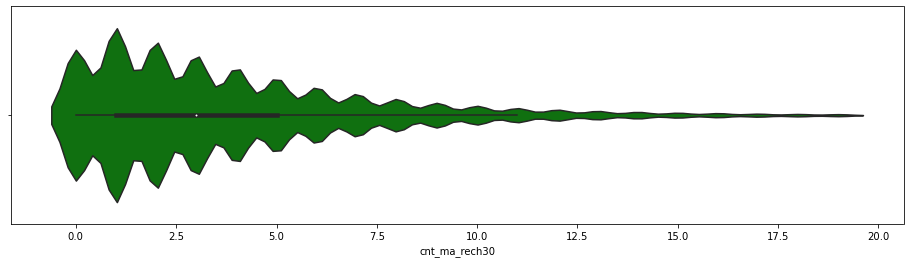

In [77]:
# getting rid of the last 1 qauntile ...
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech30 < df.cnt_ma_rech30.quantile(0.99)]['cnt_ma_rech30'],color='green')

<AxesSubplot:xlabel='cnt_ma_rech90'>

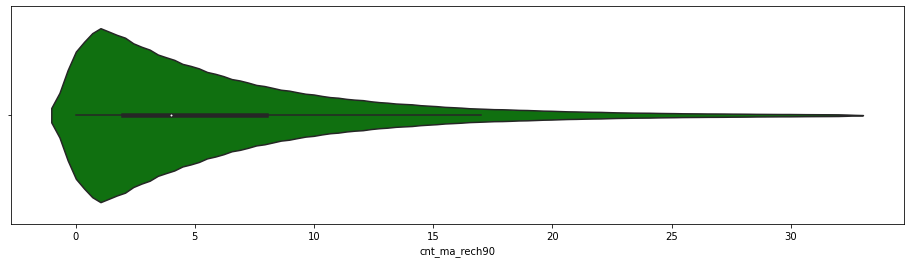

In [78]:
plt.figure(figsize=(16,4))
sns.violinplot(df[df.cnt_ma_rech90 < df.cnt_ma_rech90.quantile(0.99)]['cnt_ma_rech90'],color='green')

* we can note that just getting rid of the last 1 quantile of the data could decrease the skew by a very large margin.
* Also, we can infer that the violin plot of the count of last 90 days looks way more stable than the one with just 30 days.

In [79]:
# number of times te loan is taken by the user in 30 days and 90 days

In [80]:
df.cnt_loans30

0         2
1         1
2         1
3         2
4         7
         ..
209588    2
209589    3
209590    4
209591    2
209592    2
Name: cnt_loans30, Length: 209593, dtype: int64

In [81]:
df.cnt_loans90

0         2.0
1         1.0
2         1.0
3         2.0
4         7.0
         ... 
209588    2.0
209589    3.0
209590    6.0
209591    3.0
209592    2.0
Name: cnt_loans90, Length: 209593, dtype: float64

<AxesSubplot:xlabel='cnt_da_rech90', ylabel='Density'>

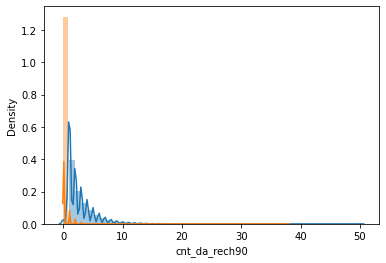

In [82]:
sns.distplot(df.cnt_loans30)
sns.distplot(df.cnt_da_rech90)

In [83]:
# sum of main recharge done in the last 30 days

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

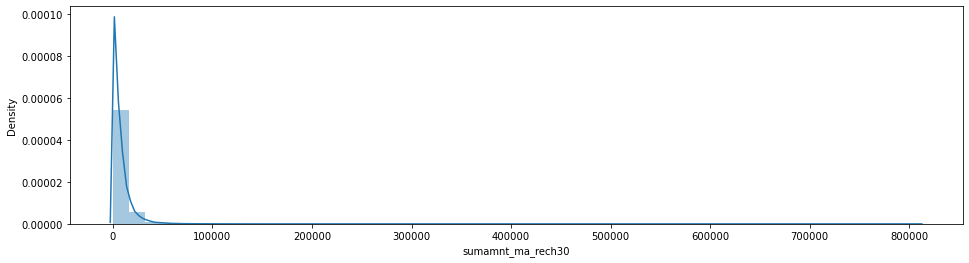

In [84]:
plt.figure(figsize=(16,4))
sns.distplot(df.sumamnt_ma_rech30)

In [85]:
# result after removing the last 1 quantile of the data

<AxesSubplot:xlabel='sumamnt_ma_rech30', ylabel='Density'>

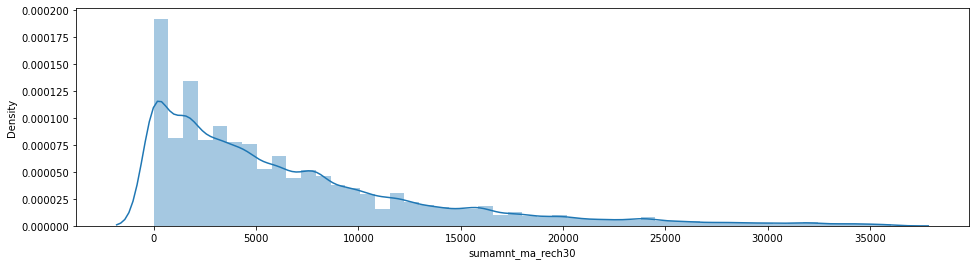

In [86]:
# data after removing the last quantile
plt.figure(figsize=(16,4))
sns.distplot(df[df.sumamnt_ma_rech30 < df.sumamnt_ma_rech30.quantile(0.98)]['sumamnt_ma_rech30'])

In [87]:
# max amount loans taken by the users

In [88]:
df.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [89]:
df.maxamnt_loans90.value_counts() / len(df) * 100

6     86.331605
12    12.693649
0      0.974746
Name: maxamnt_loans90, dtype: float64

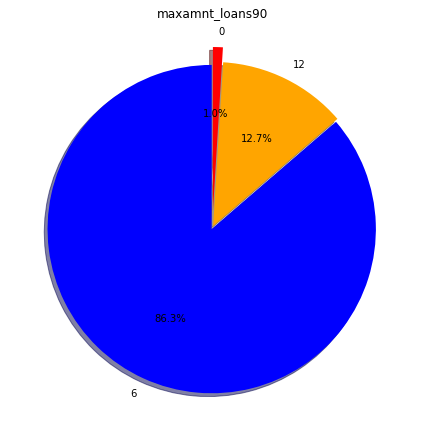

In [90]:
labels, values = zip(*Counter(df["maxamnt_loans90"]).items())
colors = [ 'blue','orange','red']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.01,0.01,0.1),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("maxamnt_loans90")
plt.show()

* mass percentage (86.3%) of the users prefer the 6 rupiah loans

In [91]:
df.payback90.describe()

count    209593.000000
mean          4.321485
std          10.308108
min           0.000000
25%           0.000000
50%           1.666667
75%           4.500000
max         171.500000
Name: payback90, dtype: float64

In [92]:
plt.figure(figsize=(16,4))
sns.distplot(df[df.label == 0].payback90)
sns.distplot(df[df.label == 1].payback90)

<AxesSubplot:xlabel='payback90', ylabel='Density'>

In [93]:
df[df.label == 0].payback90.sort_values()

104426      0.0
132691      0.0
132684      0.0
132665      0.0
132652      0.0
          ...  
155769    152.0
142810    152.5
89808     153.0
54908     153.5
171390    158.0
Name: payback90, Length: 26162, dtype: float64

In [94]:
df[df.label == 1].payback90.sort_values()

1           0.0
109901      0.0
109899      0.0
109894      0.0
109893      0.0
          ...  
34028     169.0
162257    169.5
17998     170.0
46274     170.5
149159    171.5
Name: payback90, Length: 183431, dtype: float64

# Bivarient Analysis

In [95]:
df.head()

label    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  241.0     21.228000     21.228000    159.42    159.42   
4      1  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                2.0                0.0              1539              2   
1               20.0                0.0              5787              1   
2                3.0                0.0              1539              1   
3               41.0                0.0               947              0   
4                4.0                0.0              2309              7   

   fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0          21.0             3078.0                1539.0   
1           0.0             5787.0                5787.0   
2           0.0             1539.0                1539.0   
3           0.0                0.0                   0.0   
4           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

<AxesSubplot:xlabel='daily_decr90', ylabel='rental90'>

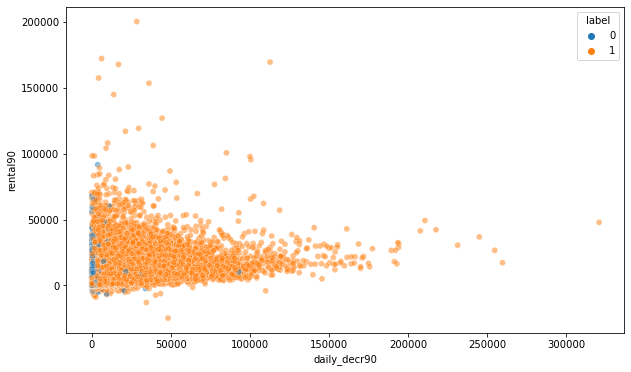

In [96]:
# daily usage vs bal
plt.figure(figsize=(10,6))
sns.scatterplot(df.daily_decr90,df.rental90,hue=df.label,alpha=0.5)

In [97]:
plt.figure(figsize=(12,4))
sns.countplot(df.maxamnt_loans90,hue=df.label)

<AxesSubplot:xlabel='maxamnt_loans90', ylabel='count'>

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Note: The number of non binary numerical features is very large (32), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


<AxesSubplot:xlabel='fr_da_rech30', ylabel='Density'>

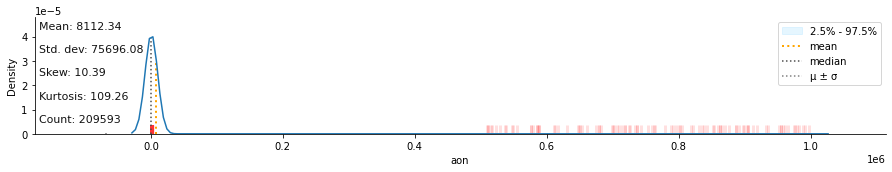

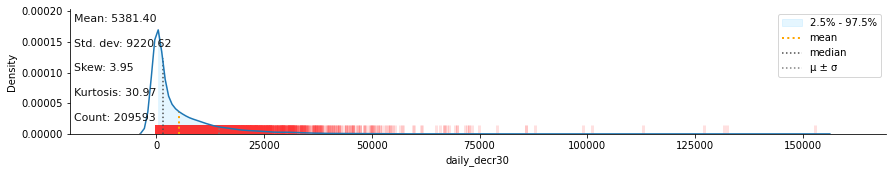

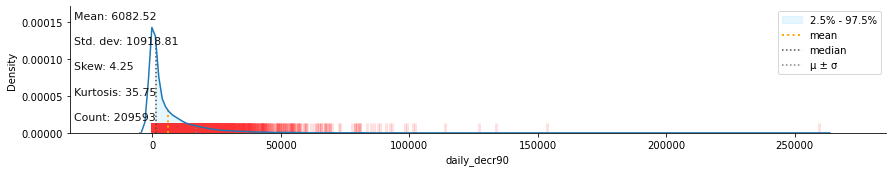

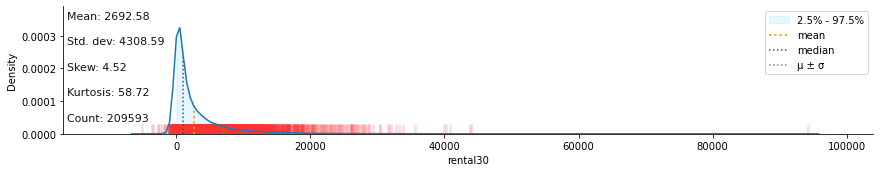

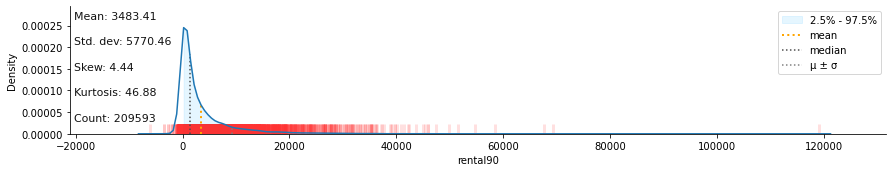

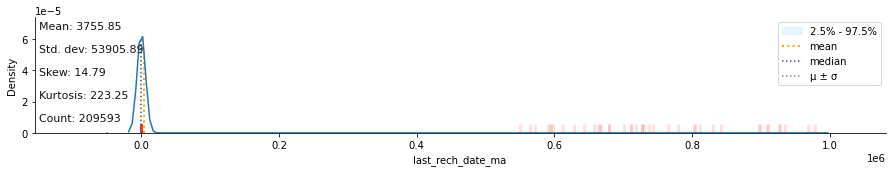

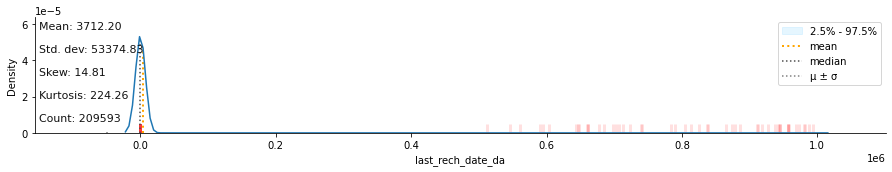

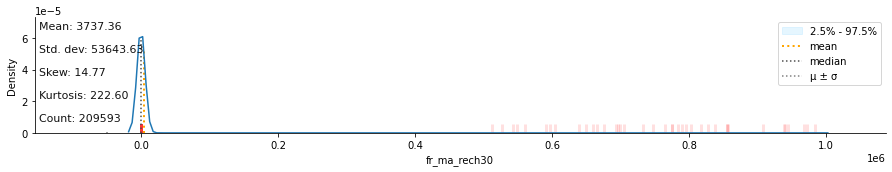

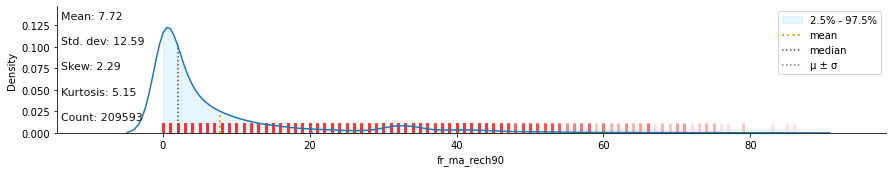

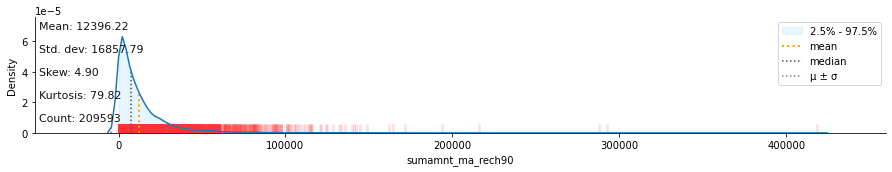

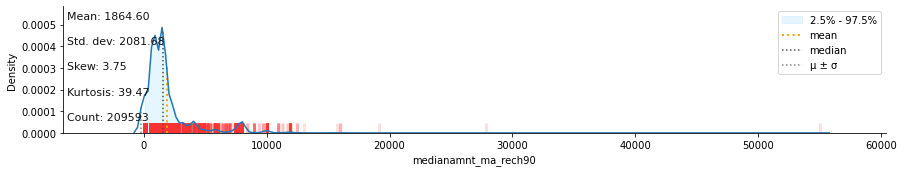

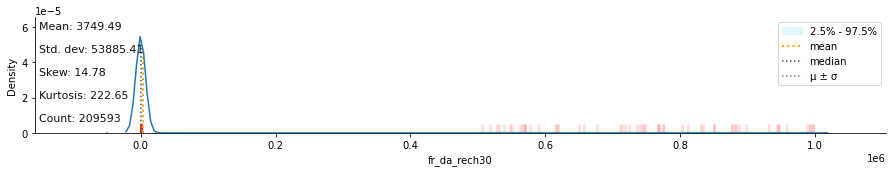

In [98]:
klib.dist_plot(df)

In [99]:
# let's detect outliers using the boxplot

In [100]:
cont_var = []
dis_num_var = []
for col in df.columns:
    if len(df.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [101]:
cont_var

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'payback30',
 'payback90']

In [102]:
dis_num_var

['label', 'medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90']

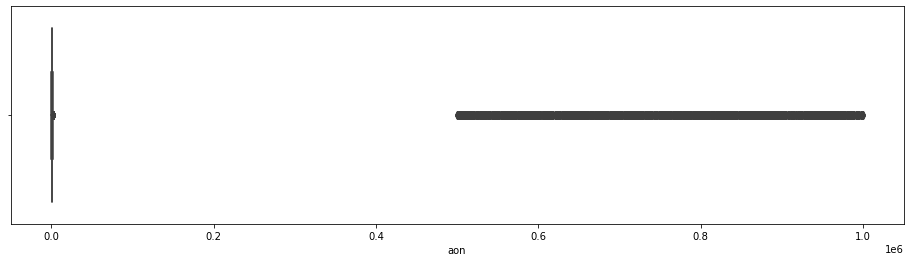

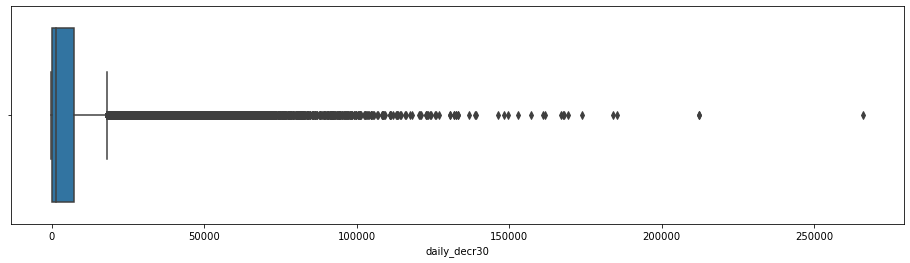

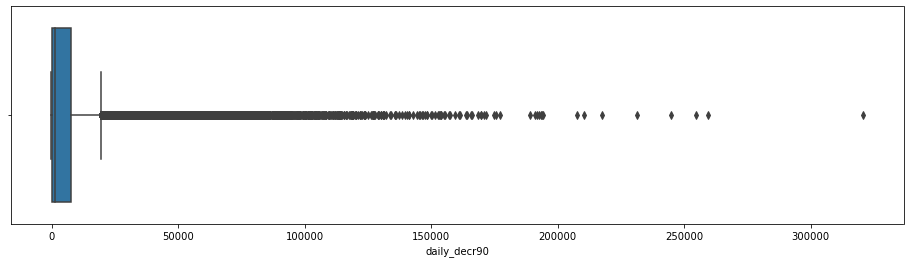

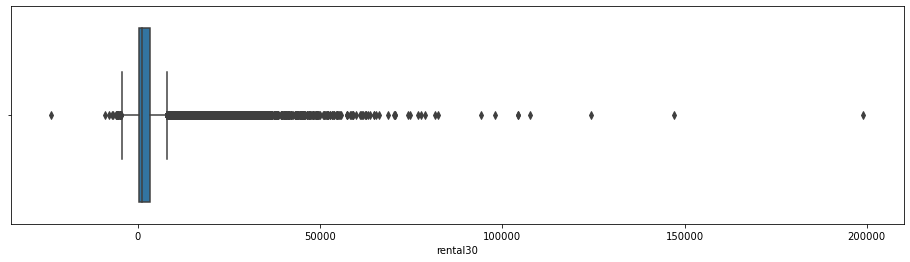

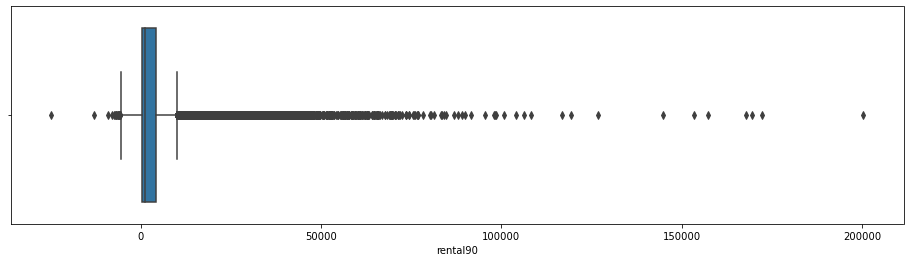

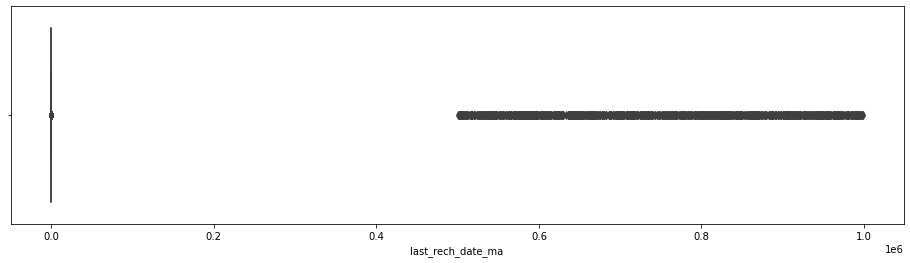

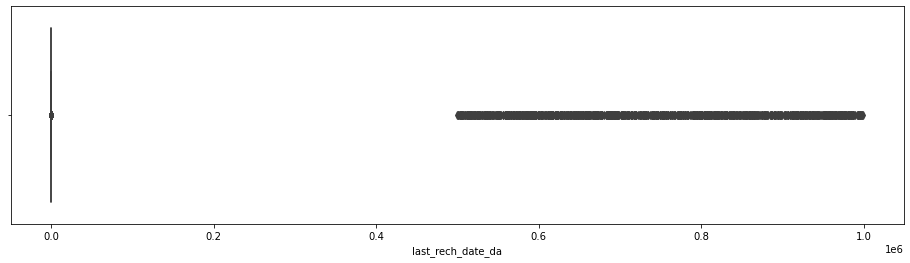

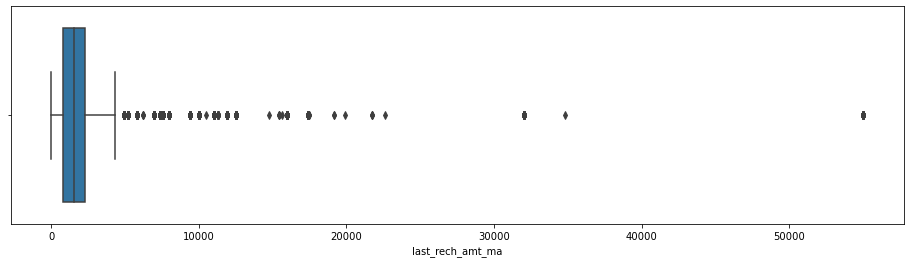

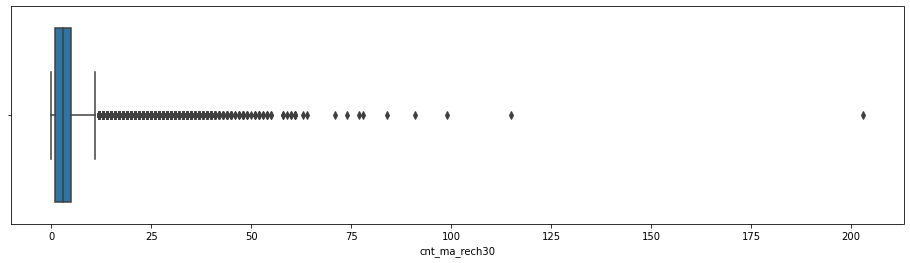

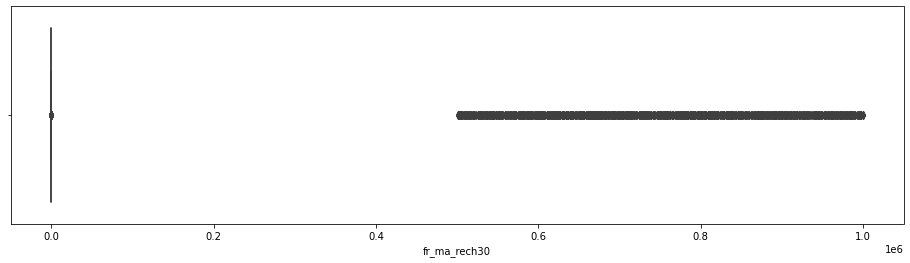

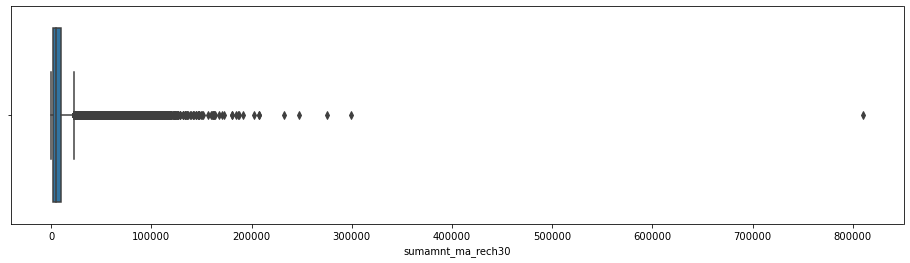

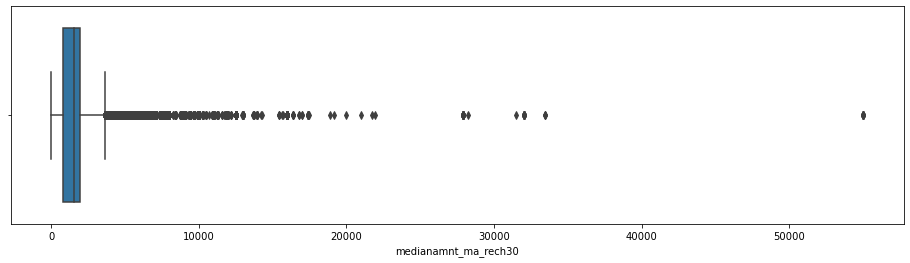

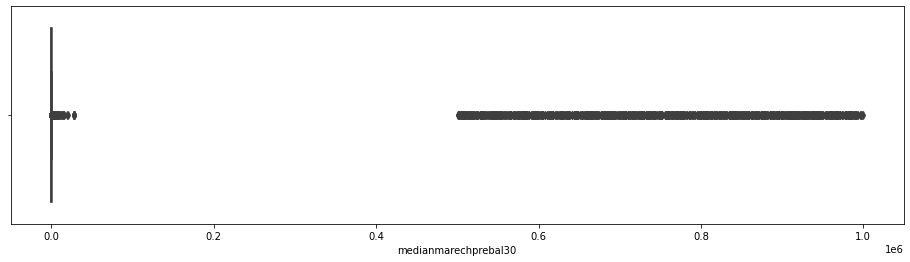

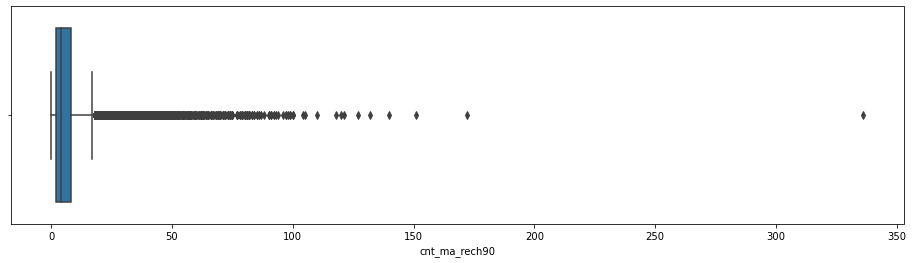

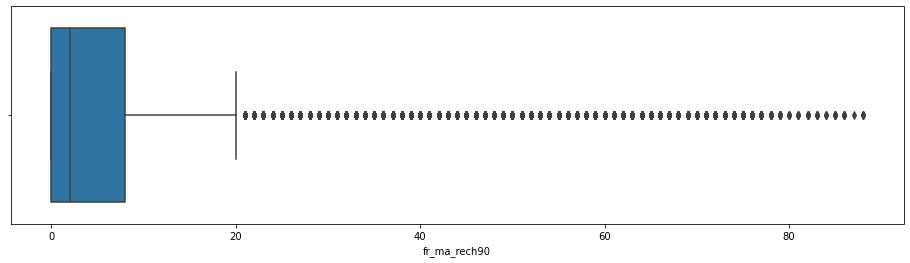

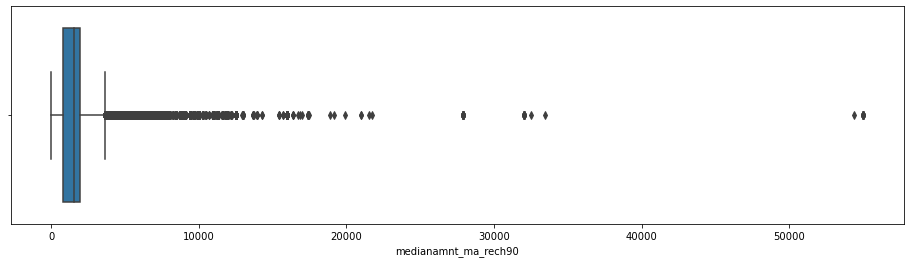

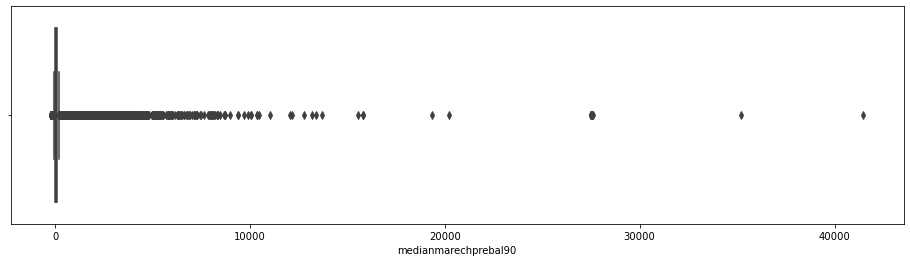

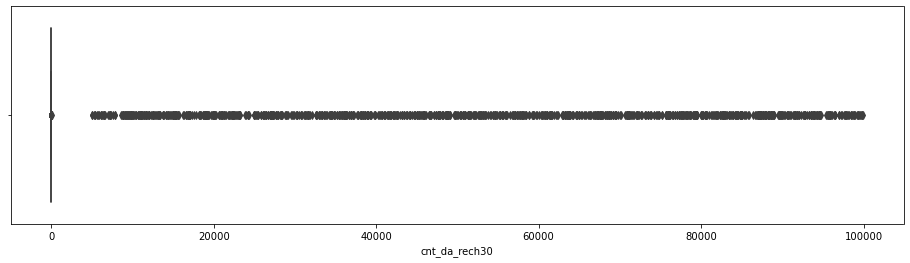

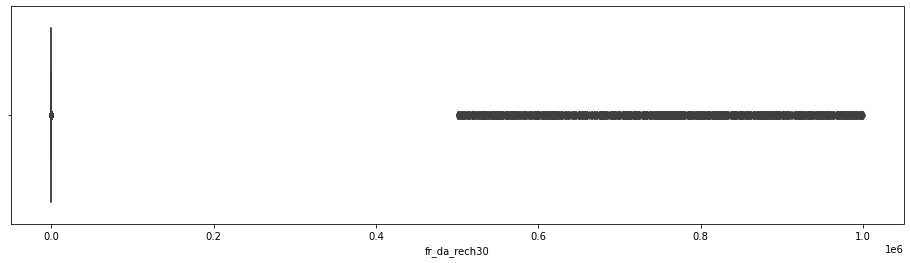

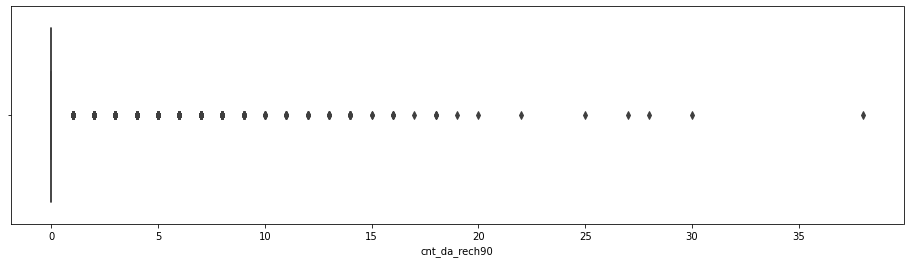

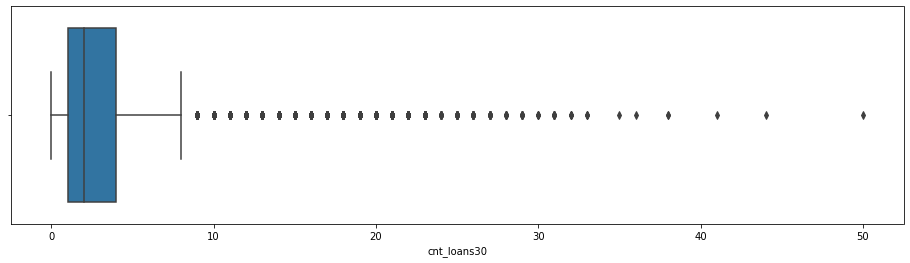

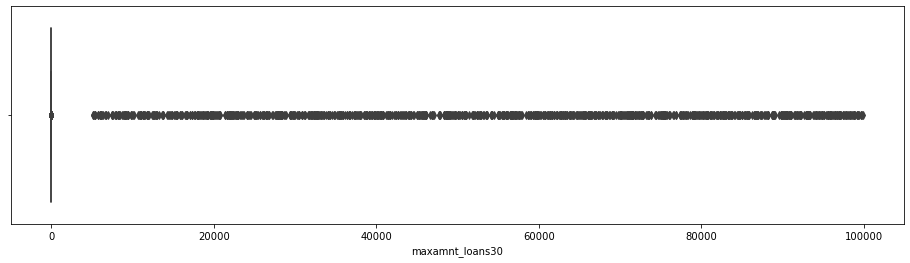

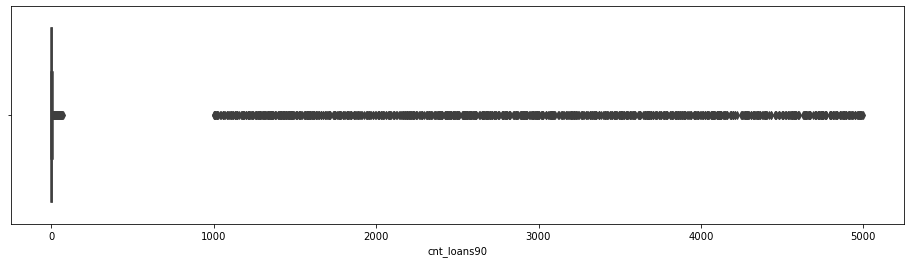

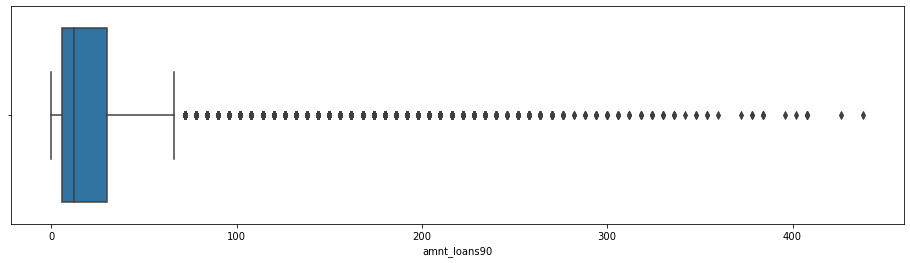

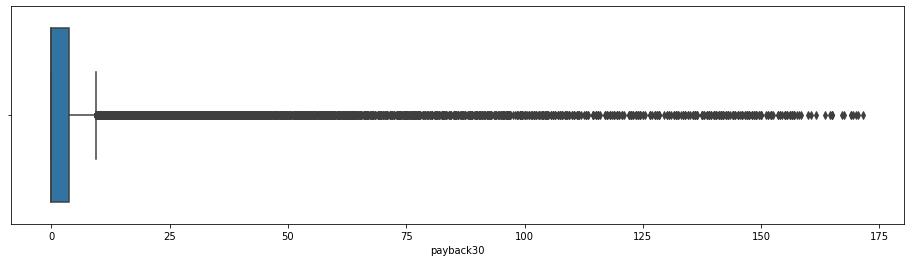

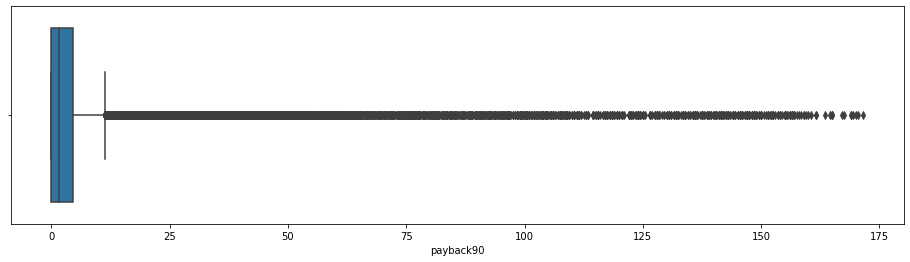

In [103]:
for col in cont_var:
    plt.figure(figsize=(16,4))
    sns.boxplot(df[col])

* We can see that almost evey feature in the dataset is hightly skewed.

In [104]:
df[cont_var].skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
cnt_loans90             16.594408
amnt_loans90             3.150006
payback30                8.310695
payback90                6.899951
dtype: float64

In [105]:
# if the maxamnt_loans90 has only 3 values (0,6,12), how come maxamnt_loans_30 have more than 10 values, they are probably outliers , let's check

In [106]:

df.maxamnt_loans90.value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [107]:
df.maxamnt_loans30.value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
94122.633158         1
59668.008360         1
                 ...  
66749.081149         1
55723.858041         1
31545.936341         1
66847.875001         1
96775.751803         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

In [108]:
# yes, these are definitely outliers , let's remove those outliers and put this variable into the dis_num_var variable.

In [109]:

df[df.maxamnt_loans30 > 20 ]

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
118         1  1454.0     19.578667     19.578667    148.88    148.88   
125         1   811.0    166.796667    166.796667    -44.88    -44.88   
146         1   198.0  18301.000000  28936.470000   8634.10  11994.34   
369         1  1737.0     33.000000     33.000000    130.05    130.05   
374         1   603.0   9970.000000  10770.000000   9343.38  15443.96   
...       ...     ...           ...           ...       ...       ...   
209189      1  1211.0  16039.000000  18645.190000   8391.52  11936.73   
209262      1   904.0     96.906667     96.906667   2516.20   2516.20   
209331      1  1846.0     55.680000     55.680000   1140.16   1140.16   
209392      1  1639.0     52.031333     52.031333    957.10    957.10   
209424      1  1246.0    113.715000    113.715000   2229.66   2229.66   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
118                   1.0                0.0               770              4   
125                   4.0                0.0              2309              9   
146                   1.0                0.0              4048              5   
369                   1.0                0.0               773              2   
374                   9.0                0.0               770              9   
...                   ...                ...               ...            ...   
209189                2.0                0.0              1539              5   
209262                5.0                0.0              7526              2   
209331                5.0                0.0              2309              2   
209392                3.0                0.0              1539              6   
209424                1.0                0.0              8000              4   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
118              5.0             3089.0                 773.0   
125              0.0            24442.0                1547.0   
146             11.0            24192.0                4048.0   
369              6.0             2320.0                1160.0   
374              0.0             6930.0                 770.0   
...              ...                ...                   ...   
209189           3.0             8565.0                1539.0   
209262          10.0            15052.0                7526.0   
209331           5.0             4618.0                2309.0   
209392           2.0             4798.0                 771.5   
209424          15.0            14938.0                2314.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
118                    16.20              4             5               3089   
125                   327.60             10             0              25989   
146                   171.00             17             3              88845   
369                    51.50              2             6               2320   
374                   149.40             10             0               7700   
...                      ...            ...           ...                ...   
209189                 60.90             11             8              17207   
209262                200.22              2            10              15052   
209331                 17.76              3            41               6338   
209392                 30.50              6             2               4798   
209424                 38.40              5            34              22338   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
118                    773.0                 16.20            0.0   
125                   1547.0                326.60            0.0   
146                   4048.0                233.00            0.0   
369                   1160.0                 51.50            0.0   
374                    770.0                119.40            0.0   
..

In [110]:
# drop these 1047 samples
df = df[df.maxamnt_loans30 < 20 ].copy()

In [111]:
cont_var = []
dis_num_var = []
for col in df.columns:
    if len(df.loc[:,col].unique()) > 10:
        cont_var.append(col)
    else:
        dis_num_var.append(col)

In [112]:
df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [113]:
dis_num_var

['label',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'maxamnt_loans90',
 'medianamnt_loans90']

In [114]:

df[df.maxamnt_loans30 > 20 ]

Empty DataFrame
Columns: [label, aon, daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, last_rech_amt_ma, cnt_ma_rech30, fr_ma_rech30, sumamnt_ma_rech30, medianamnt_ma_rech30, medianmarechprebal30, cnt_ma_rech90, fr_ma_rech90, sumamnt_ma_rech90, medianamnt_ma_rech90, medianmarechprebal90, cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, cnt_loans30, amnt_loans30, maxamnt_loans30, medianamnt_loans30, cnt_loans90, amnt_loans90, maxamnt_loans90, medianamnt_loans90, payback30, payback90]
Index: []

In [115]:
z_scores = stats.zscore(df.drop('label',1))

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_with_no_outliers = df[filtered_entries]

In [116]:
len(df_with_no_outliers)

160511

In [117]:
len(df)

208546

In [118]:

(len(df) - len(df_with_no_outliers) )/ len(df) * 100

23.033287619997505

###  direct removal of outliers is reducing a massive 23% of data which is not affordable.

# Skewness

In [119]:
df.skew()

label                   -2.270142
aon                     10.381028
daily_decr30             3.949007
daily_decr90             4.255740
rental30                 4.529371
rental90                 4.444019
last_rech_date_ma       14.794160
last_rech_date_da       14.803511
last_rech_amt_ma         3.788305
cnt_ma_rech30            3.286169
fr_ma_rech30            14.765036
sumamnt_ma_rech30        6.402504
medianamnt_ma_rech30     3.518825
medianmarechprebal30    14.768321
cnt_ma_rech90            3.425067
fr_ma_rech90             2.285936
sumamnt_ma_rech90        4.905514
medianamnt_ma_rech90     3.759065
medianmarechprebal90    44.907213
cnt_da_rech30           17.815473
fr_da_rech30            14.790531
cnt_da_rech90           27.247194
fr_da_rech90            28.990106
cnt_loans30              2.713831
amnt_loans30             2.977827
maxamnt_loans30          1.428561
medianamnt_loans30       4.556332
cnt_loans90             16.620254
amnt_loans90             3.152040
maxamnt_loans9

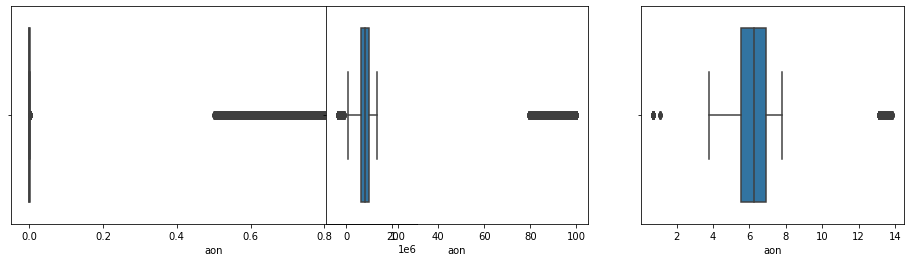

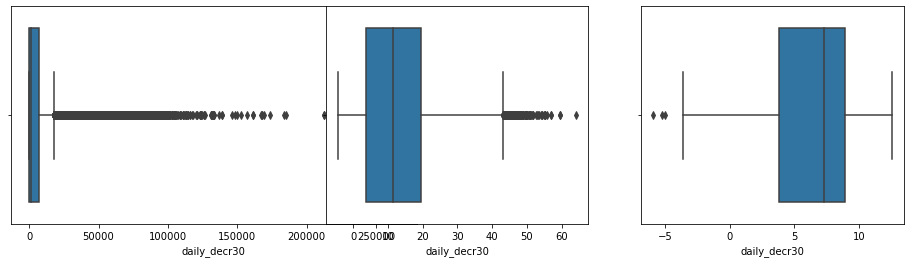

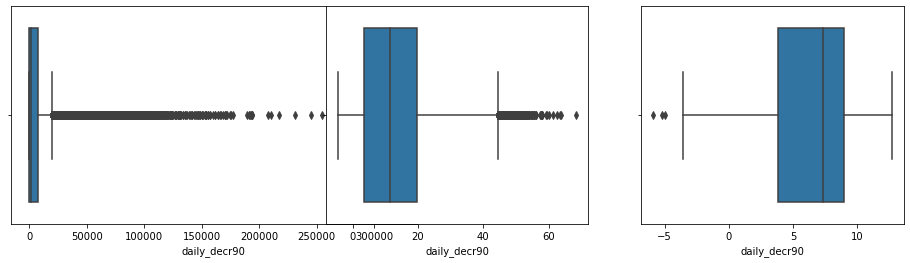

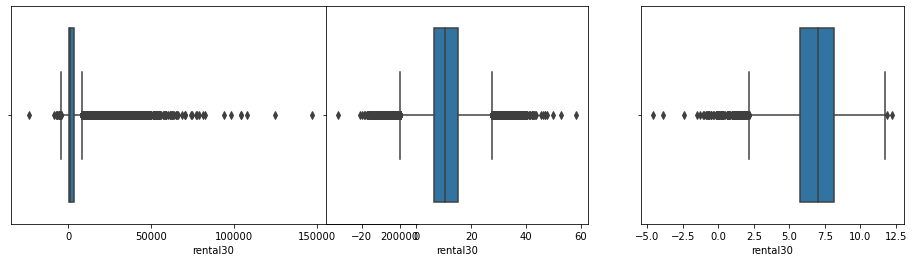

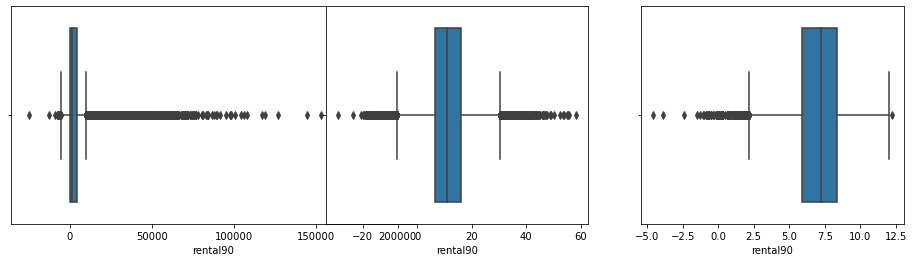

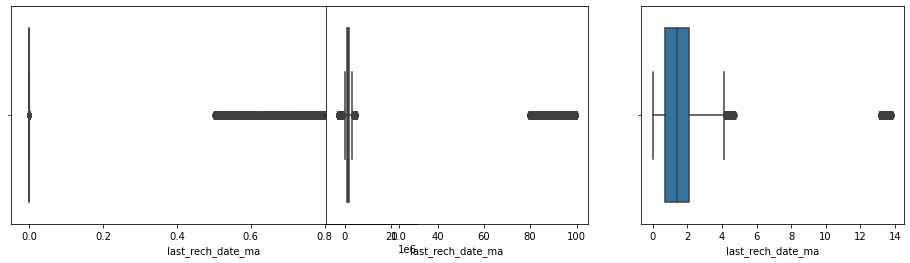

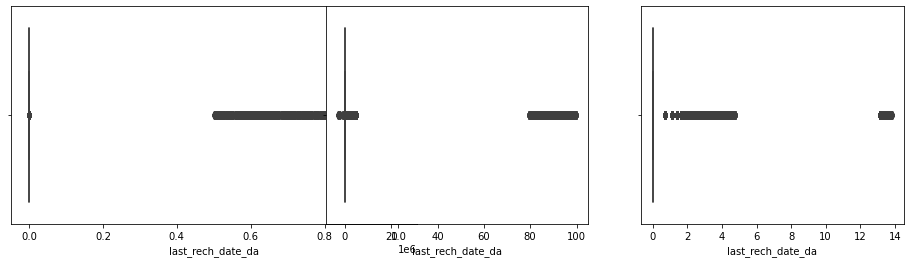

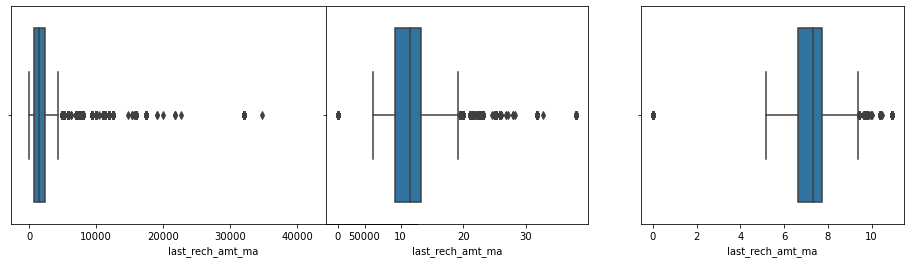

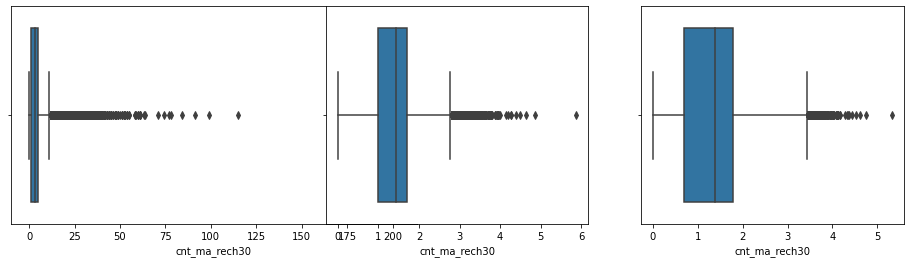

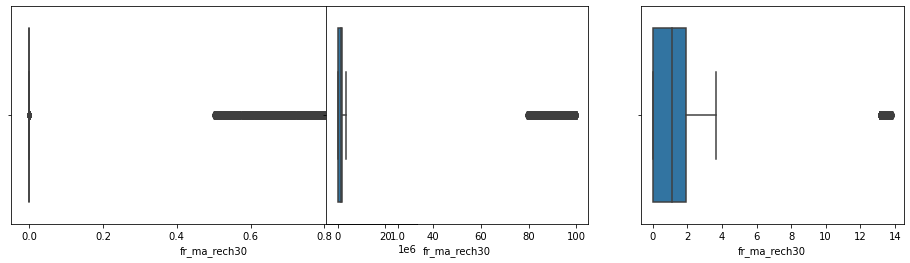

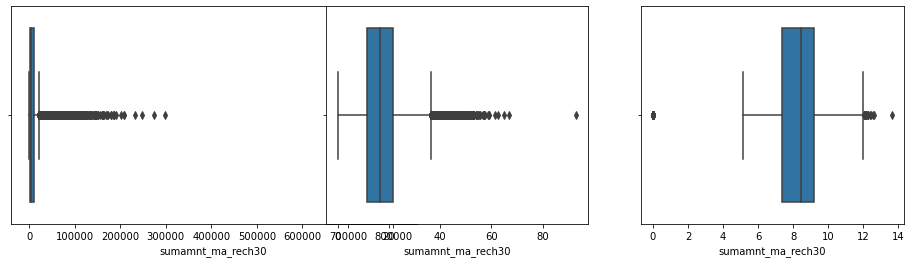

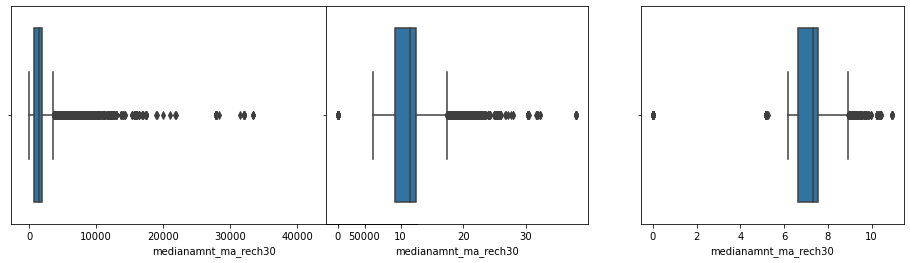

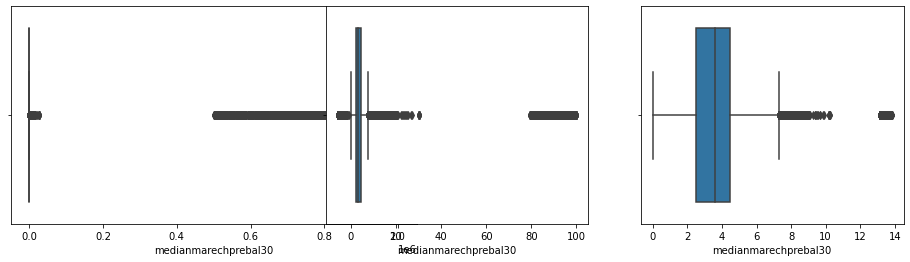

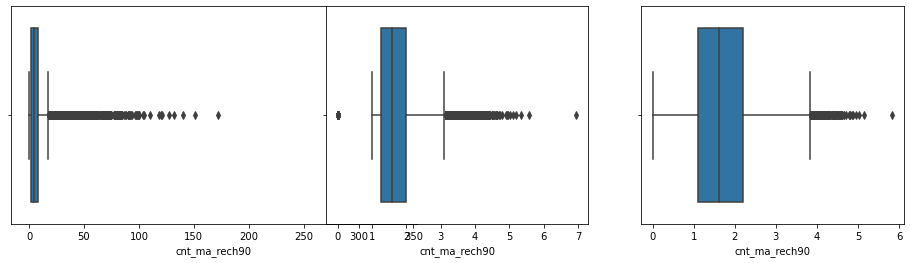

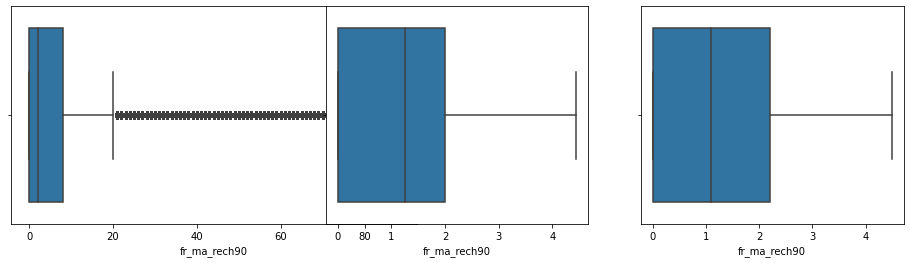

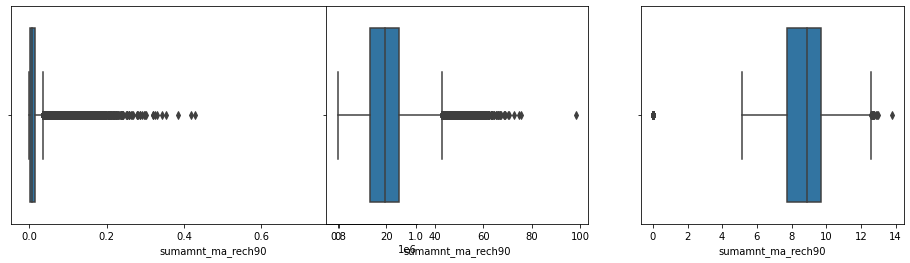

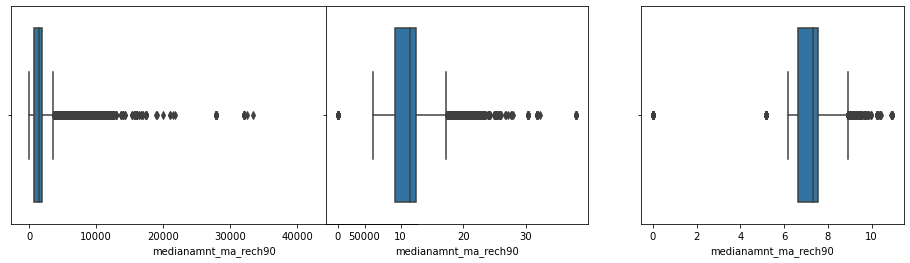

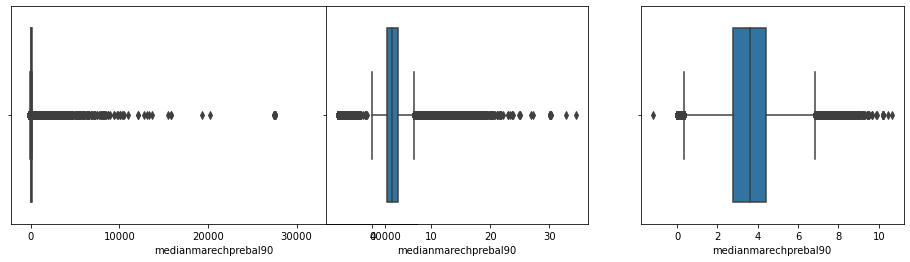

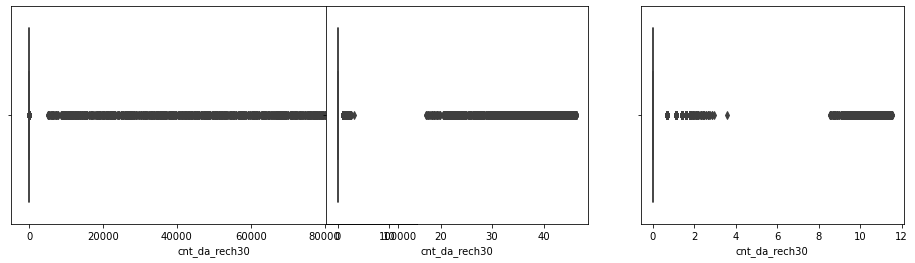

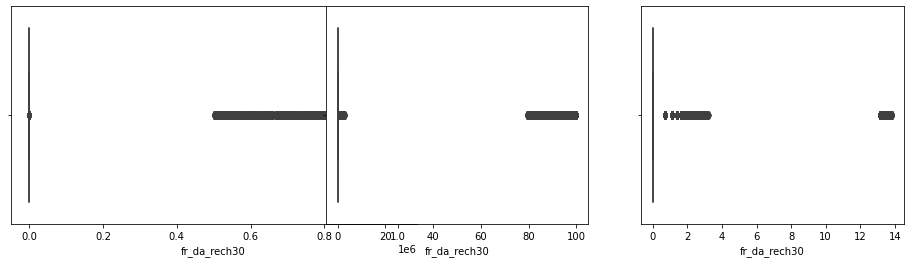

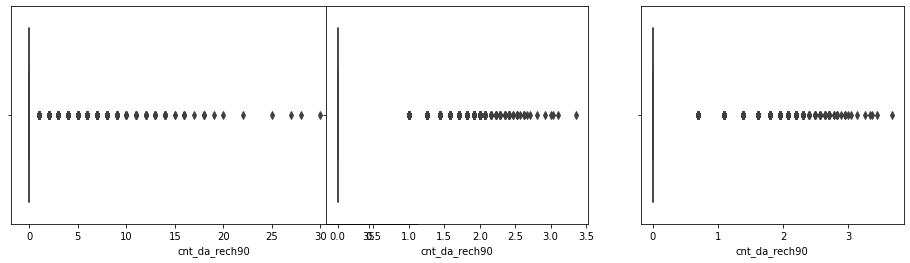

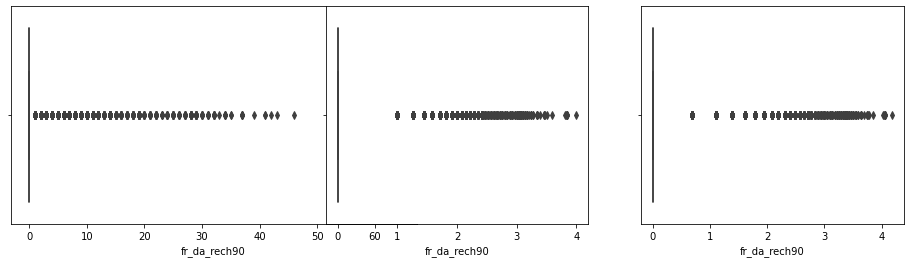

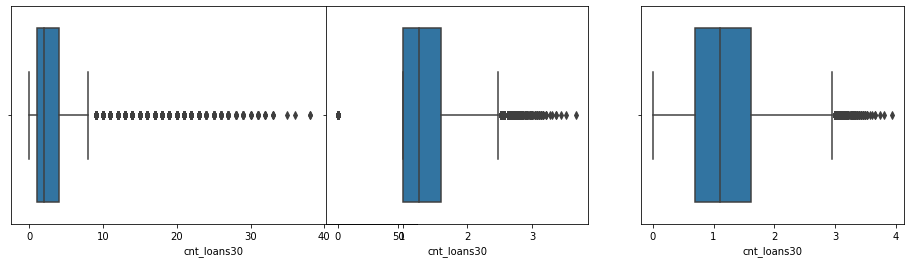

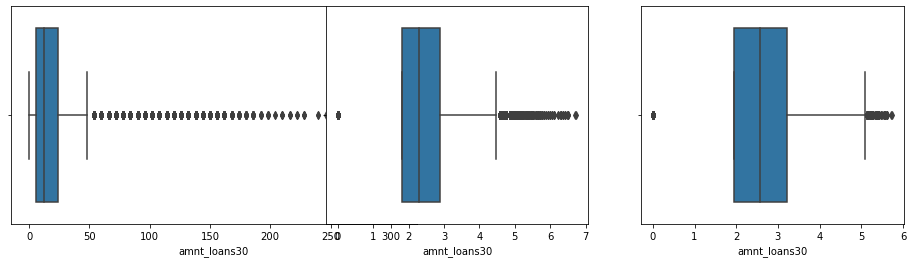

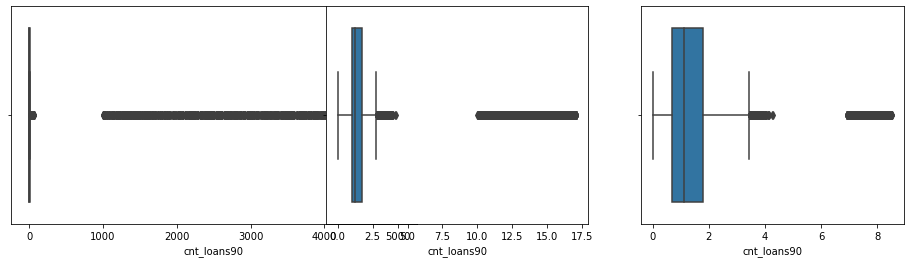

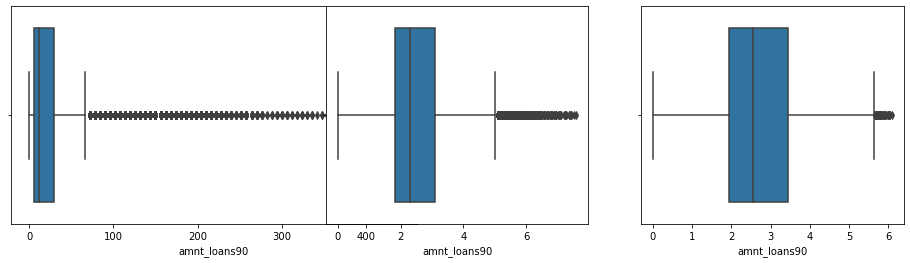

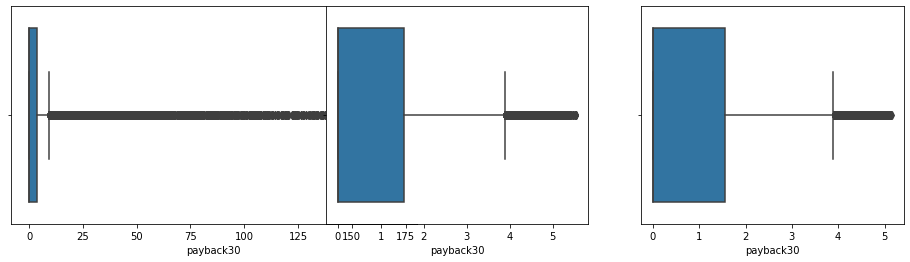

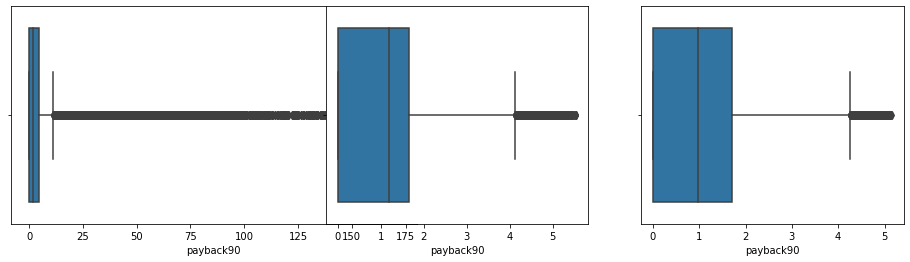

In [120]:
for col in cont_var:
    fig = plt.figure(figsize=(16,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    
    fig.add_subplot(132)
    sns.boxplot(np.cbrt(df[col])) 
    
    fig.add_subplot(133)
    sns.boxplot(np.log1p(df[col]))  # log transforation is invalid here as our dataset contains zeros and -ve values # just visualizing and comparing the results with cbrt


In [121]:
# we can see that the cbrt transformation is working better on this dataset.

In [122]:
np.cbrt(df).skew()

label                   -2.270142
aon                      8.733567
daily_decr30             0.537915
daily_decr90             0.607469
rental30                 0.084530
rental90                 0.173593
last_rech_date_ma       13.760214
last_rech_date_da       13.992451
last_rech_amt_ma        -0.401517
cnt_ma_rech30           -0.566583
fr_ma_rech30            13.688328
sumamnt_ma_rech30       -0.213210
medianamnt_ma_rech30    -0.540181
medianmarechprebal30    11.574057
cnt_ma_rech90           -0.338969
fr_ma_rech90             0.362428
sumamnt_ma_rech90       -0.016313
medianamnt_ma_rech90    -0.507004
medianmarechprebal90     0.509422
cnt_da_rech30           14.799064
fr_da_rech30            14.140006
cnt_da_rech90            6.670542
fr_da_rech90            17.521141
cnt_loans30              0.269023
amnt_loans30             0.345543
maxamnt_loans30         -3.987297
medianamnt_loans30       3.561137
cnt_loans90             10.413717
amnt_loans90             0.748906
maxamnt_loans9

# X and y split

In [123]:
X=df.drop(['label'],axis=1)

In [124]:
y=df['label']

In [125]:
X.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0  272.0   3055.050000   3065.150000    220.13    260.13                2.0   
1  712.0  12122.000000  12124.750000   3691.26   3691.26               20.0   
2  535.0   1398.000000   1398.000000    900.13    900.13                3.0   
3  241.0     21.228000     21.228000    159.42    159.42               41.0   
4  947.0    150.619333    150.619333   1098.90   1098.90                4.0   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                0.0              1539              2          21.0   
1                0.0              5787              1           0.0   
2                0.0              1539              1           0.0   
3                0.0               947              0           0.0   
4                0.0              2309              7           2.0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0             3078.0                1539.0                  7.50   
1             5787.0                5787.0                 61.04   
2             1539.0                1539.0                 66.32   
3                0.0                   0.0                  0.00   
4            20029.0                2309.0                 29.00   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0              2            21               3078                1539.0   
1              1             0               5787                5787.0   
2              1             0               1539                1539.0   
3              1             0                947                 947.0   
4              8             2              23496                2888.0   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                  7.50            0.0           0.0              0   
1                 61.04            0.0           0.0              0   
2                 66.32            0.0           0.0              0   
3                  2.50            0.0           0.0              0   
4                 35.00            0.0           0.0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12              6.0   
1             0            1            12             12.0   
2             0            1             6              6.0   
3             0            2            12              6.0   
4             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90  
0                 0.0  29.000000  29.000000  
1                 0.0   0.000000   0.000000  
2                 0.0   0.000000   0.000000  
3                 0.0   0.000000   0.000000  
4                 0.0   2.333333   2.333333

In [126]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

# Scaling

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scale=StandardScaler()

In [129]:
X_new=scale.fit_transform(X)

In [130]:
X_new

array([[-0.10367899, -0.2523501 , -0.27637837, ..., -0.22933259,
         2.90167191,  2.39253596],
       [-0.09787345,  0.73085637,  0.55322058, ..., -0.22933259,
        -0.38539921, -0.41913969],
       [-0.10020886, -0.43203813, -0.42904139, ..., -0.22933259,
        -0.38539921, -0.41913969],
       ...,
       [-0.09390194,  0.70061414,  0.53303827, ..., -0.22933259,
         0.06798991, -0.04748142],
       [-0.08441516,  0.77056963,  0.59439284, ..., -0.22933259,
        -0.38539921,  0.5988808 ],
       [-0.08640752, -0.09681546, -0.14179884, ..., -0.22933259,
        -0.38539921, -0.41913969]])

#  Train test split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.33,random_state=42)

In [133]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((139725, 32), (139725,), (68821, 32), (68821,))

# Building up the model

In [134]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [135]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [136]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_train,y_train))
    print('Test_Acc:', model.score(X_test,y_test))
    print('Recall:', recall_score(y_test,model.predict(X_test),average='micro'))
    print('Precision:',recall_score(y_test,model.predict(X_test),average='micro'))
    print('F1:',recall_score(y_test,model.predict(X_test),average='micro'))


In [135]:
# try1 : Logistic Regression

train_n_ret_scores(LogisticRegression())

Train_Acc: 0.8760350688853105
Test_Acc: 0.8765783699742811
Recall: 0.8765783699742811
Precision: 0.8765783699742811
F1: 0.8765783699742811


In [136]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.8770155662909286
Test_Acc: 0.8775083186817977
Recall: 0.8775083186817977
Precision: 0.8775083186817977
F1: 0.8775083186817977


In [137]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.9134728931830381
Test_Acc: 0.8862411182633207
Recall: 0.8862411182633207
Precision: 0.8862411182633207
F1: 0.8862411182633207


In [138]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.9996922526391125
Test_Acc: 0.866203629706049
Recall: 0.866203629706049
Precision: 0.866203629706049
F1: 0.866203629706049


In [139]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.9996779388083736
Test_Acc: 0.9139942750032694
Recall: 0.9139942750032694
Precision: 0.9139942750032694
F1: 0.9139942750032694


In [140]:
#try4: Random Forest
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.9088853104312041
Test_Acc: 0.9103326019674227
Recall: 0.9103326019674227
Precision: 0.9103326019674227
F1: 0.9103326019674227


In [141]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.9028019323671498
Test_Acc: 0.9046802574795484
Recall: 0.9046802574795484
Precision: 0.9046802574795484
F1: 0.9046802574795484


* Gradient booster and Random forest both are best model .

In [1]:
# best model

In [144]:
best_model = RandomForestClassifier()
best_model.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_preds = best_model.predict(X_test)
train_n_ret_scores(RandomForestClassifier())
print(classification_report(y_test,y_preds))

Train_Acc: 0.9999785292538915
Test_Acc: 0.9148515714680112
Recall: 0.9148515714680112
Precision: 0.9148515714680112
F1: 0.9148515714680112
              precision    recall  f1-score   support

           0       0.78      0.44      0.57      8586
           1       0.93      0.98      0.95     60235

    accuracy                           0.91     68821
   macro avg       0.85      0.71      0.76     68821
weighted avg       0.91      0.91      0.90     68821



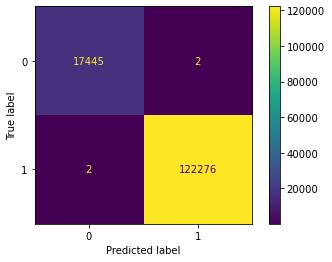

In [146]:
plot_confusion_matrix(best_model,X_train,y_train)

# Hyperparameter Tuning

* Choose following method for hyperparameter tuning

* RandomizedSearchCV > Fast but might skip some important parameters, computationally Less than grid searchcv

* GridSearchCV

* Assign hyperparameters in form of dictionery

* Fit the model

* Check best paramters and best score

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
random_best=RandomForestClassifier()

In [139]:
param_grid = { 
    'n_estimators': [10, 20,30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [ ]:
with_tune = GridSearchCV(estimator=random_best, param_grid=param_grid, cv= 5)
with_tune.fit(X_train, y_train)

In [ ]:
with_tune.best_params_